# Credit Risk Analysis

## **Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer:  Loan has been cancelled by the client but on different stages of the process.

## **Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", None,"display.max_columns", None)

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# <b>1. Importing Datasets and Routine Checks





In [3]:
# Importing application_data.csv
application_df = pd.read_csv('Dataset/application_data.csv')

In [4]:
# Importing previous_application.csv
previous_app_df = pd.read_csv('Dataset/previous_application.csv')

In [5]:
# Importing columns_description.csv
col_desc = pd.read_csv('Dataset/columns_description.csv',usecols=[1,2,3],encoding= 'unicode_escape')

In [6]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
previous_app_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [8]:
# Filter to get Column description
col_filter = col_desc[(col_desc['Table'] == 'application_data') & (col_desc['Row'] == 'TARGET')]
col_filter['Description'][1]

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

In [10]:
# shape of application_df
application_df.shape

(307511, 122)

In [11]:
# shape of previous_app_df
previous_app_df.shape

(1670214, 37)

In [12]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
previous_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [15]:
previous_app_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

# <b>2. Data Quality Check and Handling Missing Values (application_df)

### <b>a) Analysing Missing values in application_df

In [16]:
# Missing data in application_df
application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:
# Missing value percentage per column in application_df
null_1 = (application_df.isnull().sum()/application_df.shape[0]*100).round(3)
null_1

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
OWN_CAR_AGE                     65.991
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE         

In [18]:
# Shape of application_df prior removing the columns having more than 50% missing values
application_df.shape

(307511, 122)

<b>Dropping columns in application_df where missing values are greater than 50%.

In [19]:
# Dropping columns where Missing Values greater that 50% (except OWN_CAR_AGE)
cols = null_1[null_1.round() >= 50].index
application_df.drop(cols[1:],axis = 1,inplace = True)

In [20]:
# Shape of application_df post removing the columns having more than 50% missing values
application_df.shape

(307511, 79)

<b>Identifing the best metric to impute the columns which are having less than 13% missing values.

In [21]:
# Columns having less then 13% missing
null_1[(null_1 <13) & (null_1 > 0)].index

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [22]:
# Data types of columns with less than 13% missing values
application_df[null_1[(null_1 <13) & (null_1 > 0)].index].dtypes

AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_TYPE_SUITE              object
CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

In [23]:
num_miss = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
cat_miss = 'NAME_TYPE_SUITE'
application_df[num_miss].agg(['mean','median','skew']).round(2).transpose()

mean     median   skew
AMT_ANNUITY                27108.57   24903.00   1.58
AMT_GOODS_PRICE           538396.21  450000.00   1.35
EXT_SOURCE_2                   0.51       0.57  -0.79
OBS_30_CNT_SOCIAL_CIRCLE       1.42       0.00  12.14
DEF_30_CNT_SOCIAL_CIRCLE       0.14       0.00   5.18
OBS_60_CNT_SOCIAL_CIRCLE       1.41       0.00  12.07
DEF_60_CNT_SOCIAL_CIRCLE       0.10       0.00   5.28

<B>Ideally "skew" is "0" for a Normal Distribution, but as can be observed from above data following numerical columns are skewed. Thus we can use median as a central tendency to replace the missing values.

In [24]:
application_df[cat_miss].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<B>Since NAME_TYPE_SUITE is a categorical column, therefore we can replace the missing values with its mode i.e. "Unaccompanied"



### <b>b) Formatting Columns/Rows of application_df

In [25]:
# Dropping column FlAG_MOBIL as it contains no significance
application_df["FLAG_MOBIL"].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [26]:
application_df.drop(labels=['FLAG_MOBIL'],axis=1,inplace=True)

In [27]:
# formatting NAME_EDUCATION_TYPE
application_df['NAME_EDUCATION_TYPE'].replace("Secondary / secondary special","Secondary Special",inplace = True)
application_df['NAME_EDUCATION_TYPE'].value_counts()

Secondary Special    218391
Higher education      74863
Incomplete higher     10277
Lower secondary        3816
Academic degree         164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [28]:
# Replacing XNA values with null in CODE_GENDER column
application_df['CODE_GENDER'][application_df['CODE_GENDER'] == 'XNA'] = np.NaN

In [29]:
# formatting NAME_FAMILY_STATUS
application_df['NAME_FAMILY_STATUS'].replace("Single / not married","Single",inplace = True)
application_df['NAME_FAMILY_STATUS'].replace("Civil marriage","Married",inplace = True)
application_df['NAME_FAMILY_STATUS'].value_counts()

Married      226207
Single        45444
Separated     19770
Widow         16088
Unknown           2
Name: NAME_FAMILY_STATUS, dtype: int64

In [30]:
# Checking records where NAME_FAMILY_STATUS = "Unknown"
application_df[application_df['NAME_FAMILY_STATUS'] == "Unknown"]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
41982             -3265.0            -4489          NaN               1   
187348            -1597.0            -1571          NaN               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
41982            NaN                          NaN   
187348      0.670652                        0.997   

        YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
41982                            NaN                           NaN   
187348                         0.997                         0.997   

        TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982              NaN                 NaN                       3.0   
187348          0.0791                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1                0   
187348                0                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_1

In [31]:
# Removing data where NAME_FAMILY_STATUS = "Unknown"
application_df = application_df[~(application_df['NAME_FAMILY_STATUS'] == "Unknown")]

In [32]:
# formatting ORGANIZATION_TYPE
application_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [33]:
# removing "types" in occupation data to categorize into one.
application_df['ORGANIZATION_TYPE_new'] = application_df['ORGANIZATION_TYPE'].apply(lambda x : x.lower().split(" type")[0].split(":")[0])
application_df['ORGANIZATION_TYPE_new'].value_counts()

business entity        84528
xna                    55374
self-employed          38412
other                  16683
trade                  14315
industry               14311
medicine               11193
government             10404
transport               8990
school                  8893
kindergarten            6880
construction            6721
security                3247
housing                 2958
military                2634
bank                    2507
agriculture             2454
police                  2341
postal                  2157
security ministries     1974
restaurant              1811
services                1575
university              1327
hotel                    966
electricity              950
insurance                596
telecom                  577
emergency                560
advertising              429
realtor                  396
culture                  379
mobile                   317
legal services           305
cleaning                 260
religion      

In [34]:
# Taking absolute of DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH & DAYS_LAST_PHONE_CHANGE 
application_df["DAYS_BIRTH"] = application_df['DAYS_BIRTH'].abs()
application_df['DAYS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].abs()
application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].abs()
application_df['DAYS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].abs()
application_df['DAYS_LAST_PHONE_CHANGE'] = application_df['DAYS_LAST_PHONE_CHANGE'].abs()

In [35]:
# Converting DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH & DAYS_LAST_PHONE_CHANGE from days to years
application_df['YEARS_BIRTH'] = (application_df['DAYS_BIRTH'].abs()/365.25).round()
application_df['YEARS_EMPLOYED'] = (application_df['DAYS_EMPLOYED'].abs()/365.25).round()
application_df['YEARS_REGISTRATION'] = (application_df['DAYS_REGISTRATION'].abs()/365.25).round()
application_df['YEARS_ID_PUBLISH'] = (application_df['DAYS_ID_PUBLISH'].abs()/365.25).round()
application_df['YEARS_LAST_PHONE_CHANGE'] = (application_df['DAYS_LAST_PHONE_CHANGE'].abs()/365.25).round()

<b> Binning "AMT_INCOME_TOTAL" into "INCOME_CROUP"

In [36]:
application_df.AMT_INCOME_TOTAL.max()

117000000.0

In [37]:
# checking for the quantile values in total income column
np.quantile(application_df.AMT_INCOME_TOTAL, [0,0.25,0.5,0.75,1.0])

array([2.5650e+04, 1.1250e+05, 1.4715e+05, 2.0250e+05, 1.1700e+08])

In [38]:
application_df.AMT_INCOME_TOTAL.min()

25650.0

In [39]:
# Segmenting incomes into income-groups
application_df['INCOME_GROUP'] = pd.cut(application_df.loc[:,'AMT_INCOME_TOTAL'],bins=[0,50000,75000,100000,150000,300000,100000000000],labels=['50K-','50K to 75K','75K to 1L','1L to 1.5L','1.5L to 3L','3L+'])
application_df['INCOME_GROUP'].value_counts()

1.5L to 3L    129482
1L to 1.5L     91591
75K to 1L      39806
3L+            22738
50K to 75K     19375
50K-            4517
Name: INCOME_GROUP, dtype: int64

<b> Binning "YEARS_BIRTH" into "AGE_GROUP"

In [40]:
# Segmenting ages into age-groups
application_df['AGE_GROUP'] = pd.cut(application_df.loc[:,'YEARS_BIRTH'],bins=[18,25,35,45,55,65,1000],labels=['18 to 24','25 to 34','35 to 44','45 to 54','55 to 64','65+'])
application_df['AGE_GROUP'].value_counts()

35 to 44    83953
25 to 34    74216
45 to 54    69837
55 to 64    58901
18 to 24    14289
65+          6313
Name: AGE_GROUP, dtype: int64

In [41]:
# Rectifing mismatch between FLAG_OWN_CAR and OWN_CAR_AGE
application_df['FLAG_OWN_CAR'].value_counts()

N    202922
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [42]:
application_df["OWN_CAR_AGE"].isnull().sum()

202927

In [43]:
application_df['FLAG_OWN_CAR'][(application_df["OWN_CAR_AGE"].isnull() == True) & (application_df['FLAG_OWN_CAR'] == "Y")] = 'N'

In [44]:
application_df['FLAG_OWN_CAR'].value_counts()

N    202927
Y    104582
Name: FLAG_OWN_CAR, dtype: int64

In [45]:
# Removing 1 row where DAYS_LAST_PHONE_CHANGE/YEARS_LAST_PHONE_CHANGE is empty
application_df = application_df[~application_df['YEARS_LAST_PHONE_CHANGE'].isnull()]

### <b>c) Detecting Outliers in application_df

##### Boxplots of columns having outliers

In [46]:
nrow = 2
ncol = 3
fig, ax = plt.subplots(nrow,ncol,figsize = (18,8))
cols = ['YEARS_EMPLOYED','OWN_CAR_AGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
i = 0
for x in range(nrow):
  for y in range(ncol):
    application_df[cols[i]].plot.box(ax=ax[x,y])
    i += 1
plt.show()

##### <b>Outliers of YEARS_EMPLOYED 

In [47]:
# Checking outliers in YEARS_EMPLOYED
application_df['YEARS_EMPLOYED'][application_df['YEARS_EMPLOYED']>100].value_counts()

1000.0    55374
Name: YEARS_EMPLOYED, dtype: int64

<b>Since there are 55374 records with YEARS_EMPLOYED > 1000 which is INVALID. Thus its better to replace them with null values.

In [48]:
# Since there are 55374 records with YEARS_EMPLOYED > 1000 which is INVALID. Thus its better to replace them with null values
application_df['YEARS_EMPLOYED'][application_df['YEARS_EMPLOYED']>100] = np.NaN

##### <b>Outliers of OWN_CAR_AGE

In [49]:
print('\n\n 99th Percentile of OWN_CAR_AGE : ',application_df['OWN_CAR_AGE'].quantile(0.99))



 99th Percentile of OWN_CAR_AGE :  64.0


<B> We can cap OWN_CAR_AGE at 99 percentile to takecare of its outliers

##### <b>Outliers of OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE

In [50]:
# Removing SK_ID_CURR = 272071 & 189856 will takecare of all 4 outliers
application_df[application_df['OBS_30_CNT_SOCIAL_CIRCLE'] > 30]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77497       189856       0         Cash loans           M            Y   
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77497                Y             1          157500.0    296280.0   
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
77497       23539.5         225000.0          Family          Working   
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
77497    Secondary Special            Married  House / apartment   
148403    Higher education             Single  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
77497                     0.010147       14767           2767   
148403                    0.020246       10111           1917   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  \
77497             13306.0             4720         11.0               1   
148403             2306.0             2306          NaN               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
77497                 0                 1           0           1   
148403                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
77497         Laborers              3.0                     2   
148403      Core staff              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
77497                             2                     MONDAY   
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
77497                        17                           0   
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
77497                            0                            0   
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
77497                        0                       0   
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
77497                         0  Industry: type 4      0.398805      0.750375   
148403                        1            Police      0.304506      0.357293   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE  \
77497                        0.9816                        0.9816   
148403                       0.9866                        0.9866   

        YEARS_BEGINEXPLUATATION_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  \
77497                         0.9816          0.2057                  No   
148403                        0.9866          0.0299                  No   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
77497                       47.0                       0.0   
148403                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
77497                       47.0                       0.0   
148403                     344.0                      24.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
77497                      0.0                0                1   
148403                   667.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
77497                 0                0                0                0   
148403                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FL

<B>We can remove records of SK_ID_272071 & 189856 to handle the outliers in OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE.

# <b>3. Data Analysis

##### Style Settings

In [51]:
# Styling
plt.style.use('seaborn')

fontTitle = {'family': 'DejaVu Sans',
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }

fontLabel = {'family': 'DejaVu Sans',
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }

## <b>a) Checking for Data-Imbalance in application_df

In [52]:
application_df["TARGET"].value_counts()

0    282683
1     24825
Name: TARGET, dtype: int64

In [53]:
(application_df["TARGET"].value_counts(normalize=True)*100).round()

0    92.0
1     8.0
Name: TARGET, dtype: float64

In [54]:
plt.figure(figsize=(10,5))
(application_df.TARGET.value_counts(normalize=True)*100).plot.barh()
plt.title('Target Imbalance percentage',fontdict = fontTitle)
plt.xlabel('Percentage(%)',fontdict = fontLabel)
plt.ylabel('Target',fontdict = fontLabel)
plt.yticks([1,0],["Target 1","Target 0"])
plt.show()

<B>As can be seen from above data, there are only 8% samples of client with payment difficulties(i.e. TARGET = 0), whereas 92% of the samples represent other cases(i.e. TARGET = 1). Thus we can conclude there is a data imbalance.

## <b>b) Segmenting Dataframe based on TARGET variable

In [56]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied          Working   Secondary Special   
1        1129500.0          Family    State servant    Higher education   
2         135000.0   Unaccompanied          Working   Secondary Special   
3         297000.0   Unaccompanied          Working   Secondary Special   
4         513000.0   Unaccompanied          Working   Secondary Special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0             Single  House / apartment                    0.018801   
1            Married  House / apartment                    0.003541   
2             Single  House / apartment                    0.010032   
3            Married  House / apartment                    0.008019   
4             Single  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0        9461            637             3648.0             2120          NaN   
1       16765           1188             1186.0              291          NaN   
2       19046            225             4260.0             2531         26.0   
3       19005           3039             9833.0             2437          NaN   
4       19932           3038             4311.0             3458          NaN   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2         

In [57]:
# Clients with payment difficulties(Defaulted)
app_df_1 = application_df[application_df["TARGET"] == 1].reset_index(drop=True)
# For other cases where TARGET = 0(Not Defaulted)
app_df_0 = application_df[application_df["TARGET"] == 0].reset_index(drop=True)

In [58]:
app_df_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100096       1         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          112500.0    979992.0      27076.5   
2               Y             0          202500.0   1193580.0      35028.0   
3               N             0          135000.0    288873.0      16258.5   
4               Y             0           81000.0    252000.0      14593.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0         351000.0   Unaccompanied               Working   Secondary Special   
1         702000.0   Unaccompanied               Working   Secondary Special   
2         855000.0   Unaccompanied  Commercial associate   Secondary Special   
3         238500.0   Unaccompanied               Working   Secondary Special   
4         252000.0   Unaccompanied             Pensioner   Secondary Special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0             Single  House / apartment                    0.018801   
1              Widow  House / apartment                    0.018029   
2            Married  House / apartment                    0.025164   
3            Married  House / apartment                    0.007305   
4            Married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0        9461            637             3648.0             2120          NaN   
1       18724           2628             6573.0             1827          NaN   
2       17482           1262             1182.0             1029          NaN   
3       13384           3597               45.0             4409          NaN   
4       24794         365243             5391.0             4199          NaN   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                1                 1           1           0   
4               0                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1   Cooking staff              1.0                     3   
2        Laborers              2.0                     2   
3     Sales staff              2.0                     3   
4             NaN              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            2                     MONDAY   
2                            2                    TUESDAY   
3                            3                   THURSDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                        9                           0   
2                        9                           0   
3                       11                           0   
4                       10                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0             

In [59]:
app_df_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100003       0         Cash loans           F            N   
1      100004       0    Revolving loans           M            Y   
2      100006       0         Cash loans           F            N   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             0          270000.0   1293502.5      35698.5   
1               Y             0           67500.0    135000.0       6750.0   
2               Y             0          135000.0    312682.5      29686.5   
3               Y             0          121500.0    513000.0      21865.5   
4               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0        1129500.0           Family    State servant    Higher education   
1         135000.0    Unaccompanied          Working   Secondary Special   
2         297000.0    Unaccompanied          Working   Secondary Special   
3         513000.0    Unaccompanied          Working   Secondary Special   
4         454500.0  Spouse, partner    State servant   Secondary Special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.003541   
1             Single  House / apartment                    0.010032   
2            Married  House / apartment                    0.008019   
3             Single  House / apartment                    0.028663   
4            Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       16765           1188             1186.0              291          NaN   
1       19046            225             4260.0             2531         26.0   
2       19005           3039             9833.0             2437          NaN   
3       19932           3038             4311.0             3458          NaN   
4       16941           1588             4970.0              477          NaN   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                1                 1           1           0   
2               1                0                 1           0           0   
3               1                0                 1           0           0   
4               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0      Core staff              2.0                     1   
1        Laborers              1.0                     2   
2        Laborers              2.0                     2   
3      Core staff              1.0                     2   
4        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            1                     MONDAY   
1                            2                     MONDAY   
2                            2                  WEDNESDAY   
3                            2                   THURSDAY   
4                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       11                           0   
1                        9                           0   
2                       17                           0   
3                       11                           0   
4                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2   

## <b>c) Univariate Analysis(Application_df)
- Categorical Data
  1. Ordered Categorical Data
  2. Unordered Categorical Data
- Numerical Data






### <b>Categorical Data

#### <b>Ordered Categorical Data</b>
- Age
- Income
- Education

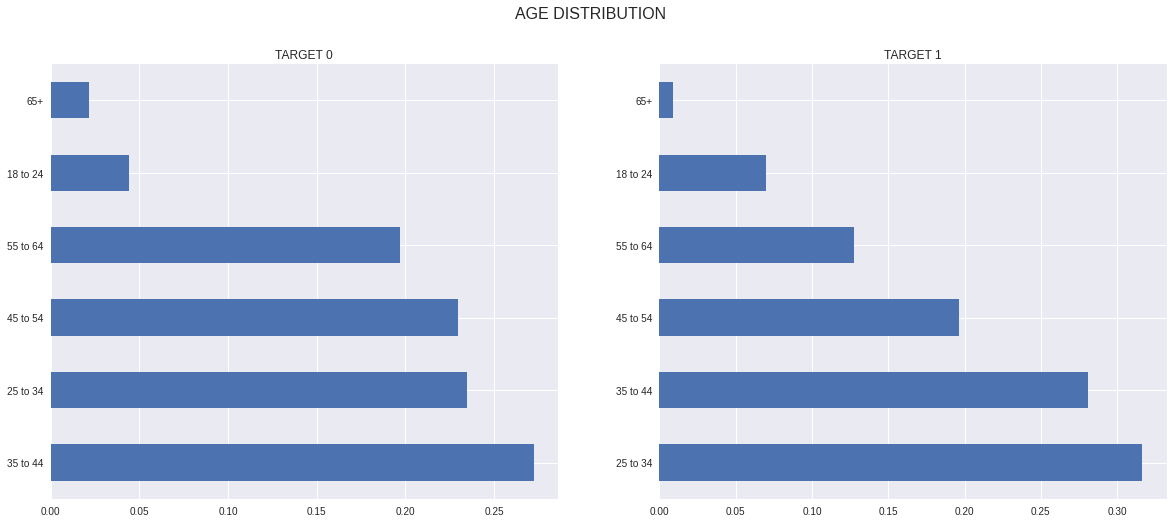

In [60]:
#Age

fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.suptitle('AGE DISTRIBUTION',fontsize=16)
plt.subplot(1,2,1)
app_df_0['AGE_GROUP'].value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
app_df_1['AGE_GROUP'].value_counts(normalize=True).plot.barh()

ax1.title.set_text('TARGET 0')
ax2.title.set_text('TARGET 1')

plt.show()

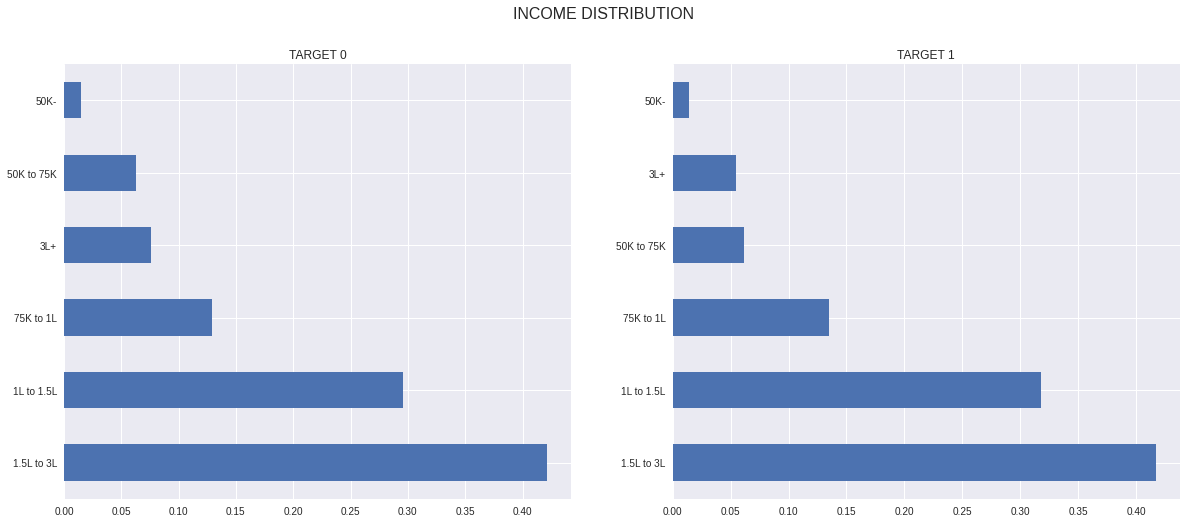

In [61]:
#Income

fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('INCOME DISTRIBUTION',fontsize=16)
plt.subplot(1,2,1)
app_df_0['INCOME_GROUP'].value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
app_df_1['INCOME_GROUP'].value_counts(normalize=True).plot.barh()

ax1.title.set_text('TARGET 0')
ax2.title.set_text('TARGET 1')


plt.show()

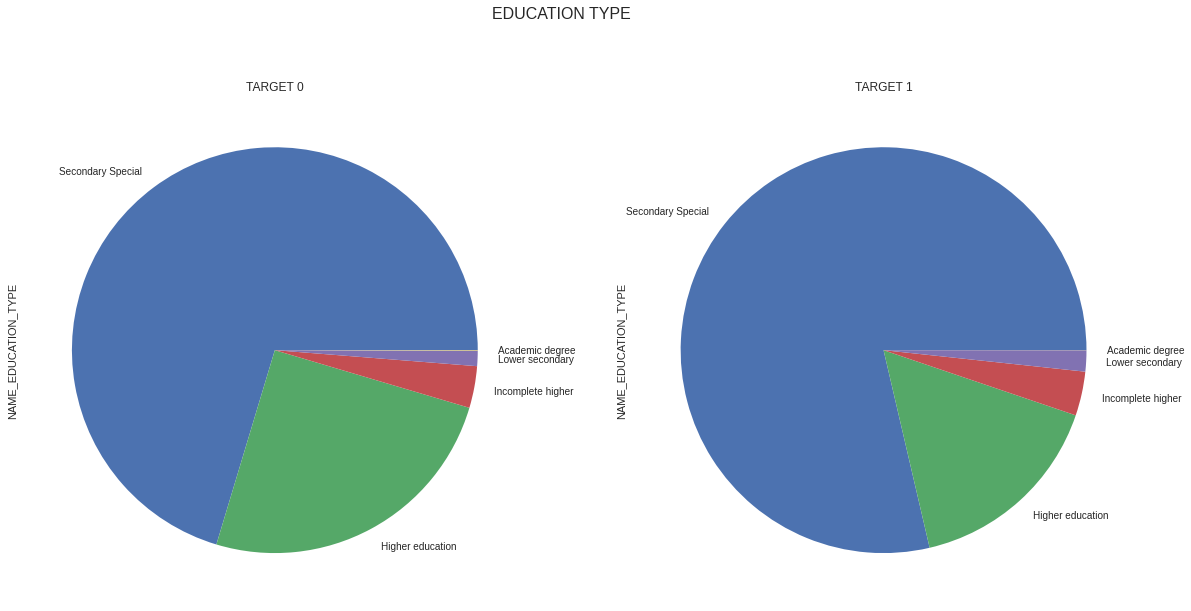

In [62]:
#Education

fig = plt.figure(figsize=[20,10])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('EDUCATION TYPE',fontsize=16)
plt.subplot(1,2,1)
app_df_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2)
app_df_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.pie()

ax1.title.set_text('TARGET 0')
ax2.title.set_text('TARGET 1')

plt.show()

####<b>Inferences</b>
- As per Age Distribution, clients between 25 to 34 years of age are having the most payment difficulties.
- Income Distribution mostly lie between 1.5L to 3L for both client segments.
- Clients with payment difficulties have slightly less distribution in Higher Education than other clients without payment difficulties.
 


#### <b>Unordered Categorical Data</b>
- Gender
- Contract Type
- Housing Type
- Owns Realty
- Occupation Type
- Family Status
- Income Type

In [63]:
nrow = 7
ncol = 2
fig, ax = plt.subplots(nrow,ncol,figsize = (18,50))
cols = ['CODE_GENDER','NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE','FLAG_OWN_REALTY','OCCUPATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE']
i = 0

for x in range(nrow):
      ax[x,0].set_title('TARGET 0')
      ax[x,1].set_title('TARGET 1')
      order_0 = app_df_0[cols[i]].value_counts(ascending=True).index
      sns.countplot(app_df_0[cols[i]],ax=ax[x,0], order=order_0)
      ax[x,0].set_xticklabels(labels = ax[x,0].get_xticklabels() ,rotation=90)
      
      order_1 = app_df_1[cols[i]].value_counts(ascending=True).index
      sns.countplot(app_df_1[cols[i]],ax=ax[x,1], order=order_1)
      ax[x,1].set_xticklabels(labels = ax[x,1].get_xticklabels() ,rotation=90)
      fig.tight_layout(pad=5)

      i +=1

plt.show()

#### <B>Inferences:</B>
- Ratio between gender is less for clients with payment difficulties.
- "House/Apartments" has the highest distribution in Housing type irrespective of TARGET(0 or 1).
- In the current running loans "laborers" have the highest frequency in Occupation Type.
- "Married" is the highest distribution in Family Status irrespective of TARGET(0 or 1).
- "Working" class is the highest distribution in Income Type irrespective of TARGET(0 or 1).

### <b>Numerical Data</b>
- Credit
- Annuity 
- Years Employed
- Owned car age
- Days passed since phone change
- Credit Score (EXT_SOURCE_2)

In [ ]:
nrow = 6
ncol = 2
fig, ax = plt.subplots(nrow,ncol,figsize = (15,60),sharey='row')
cols = ['AMT_CREDIT','AMT_ANNUITY','YEARS_EMPLOYED','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']
i = 0
 
for x in range(nrow): 
      ax[x,0].set_title('TARGET 0')
      ax[x,1].set_title('TARGET 1')
      
      app_0_cap = app_df_0[cols[i]].quantile(0.95)
      sns.boxplot(cols[i],data=app_df_0[app_df_0[cols[i]] < app_0_cap],ax=ax[x,0],orient='v')
      
      app_1_cap = app_df_1[cols[i]].quantile(0.95)
      sns.boxplot(cols[i],data=app_df_1[app_df_1[cols[i]] < app_1_cap],ax=ax[x,1],orient='v')
      fig.tight_layout(pad=5)
 
      i +=1
 
plt.show()

### <b>Inferences:</b>
- Credit and annuality distribution seems to be similar for both targets(i.e. 0 or 1).
- Clients with payment difficulties genrally have employment years between 2 to 6 years, whereas for other cases it falls between 2 to 8 years.
- Clients with payment difficulties generally own car that is older (2 to 3 years) than clients with no payment difficulties.
- For Clients with payment difficulties, frequency of changing phone is slightly higher than normal clients.
- Credit score generally seems to be lower for clients with payment difficulties.

<b>Remark: Assuming EXT_SOURCE_2 as credit score.


## <b>d) Bivariate Analysis(Application_df)
- Categorical - Categorical
- Categorical - Numerical
- Numerical - Numeical

### <b>Categorical-Categorical</b>
- Gender - Income Group
- Age Group - Income Group
- Gender - Age Group
- Gender - Education Type
- Contract Type - Income Group
- Owns Car - Age Group
- Owns Reality - Age Group

In [64]:
columns = ['CODE_GENDER','AGE_GROUP','CODE_GENDER','CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']
indices = ['INCOME_GROUP','INCOME_GROUP','AGE_GROUP','NAME_EDUCATION_TYPE','INCOME_GROUP','AGE_GROUP','AGE_GROUP']

nrow = 7
ncol = 2
fig, ax = plt.subplots(nrow,ncol,figsize = (18,70))
i = 0

for x in range(nrow):
  ax[x,0].set_title('TARGET 0')
  ax[x,1].set_title('TARGET 1')

  (app_df_0.pivot_table(columns=columns[i],index=indices[i],aggfunc='count')['TARGET']).plot.bar(stacked=True,ax=ax[x,0])

  (app_df_1.pivot_table(columns=columns[i],index=indices[i],aggfunc='count')['TARGET']).plot.bar(stacked=True,ax=ax[x,1])
  fig.tight_layout(pad=5)

  i +=1
 

### <b>Inferences:</b>
- Males with payment difficulties have slightly higher distribution in 1 lac+ income groups than males without payment difficulties.
- Relatively fewer people have cars across all age group where target is 1.
- Client with payment difficulties Income groups between 1Lacs to 3 Lacs have slightly higher percentage of Cash Loans.
- Clients with payment difficulties who falls under 25 to 34 age group have slightly more tendency to have a home compared to other age groups.


### <b>Categorical-Numerical</b>
- Annuity - Housing Type
- Annuity - Income type
- Credit - Contract Type
- Credit - Income Type
- Credit - Family Status
- Car Age - Family Status

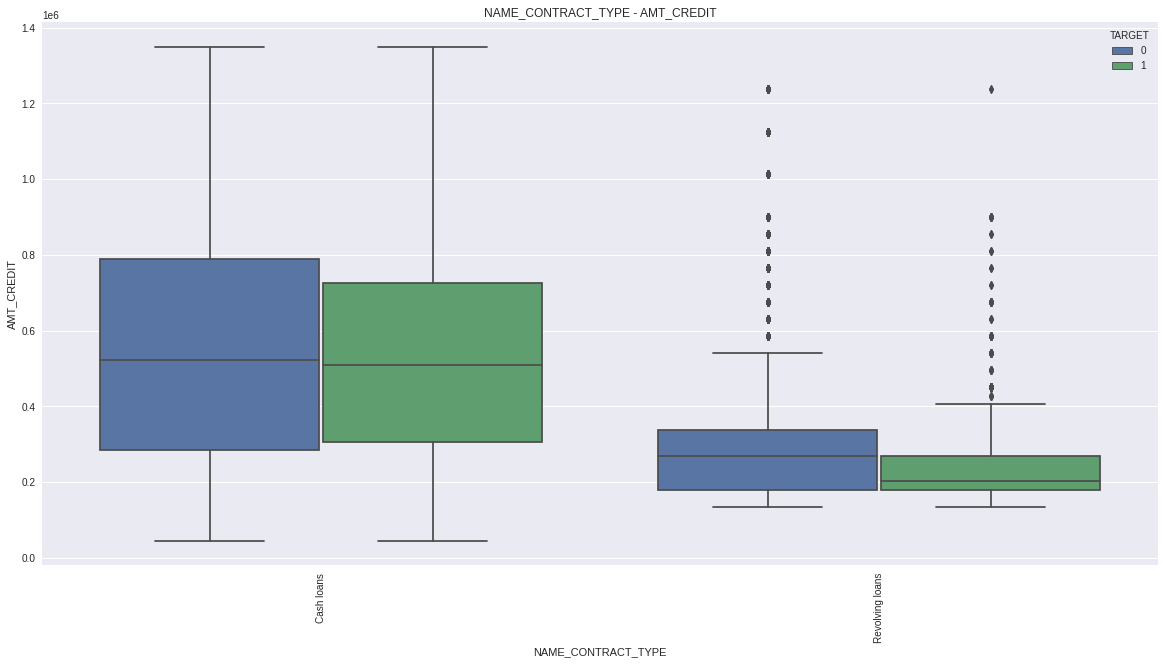

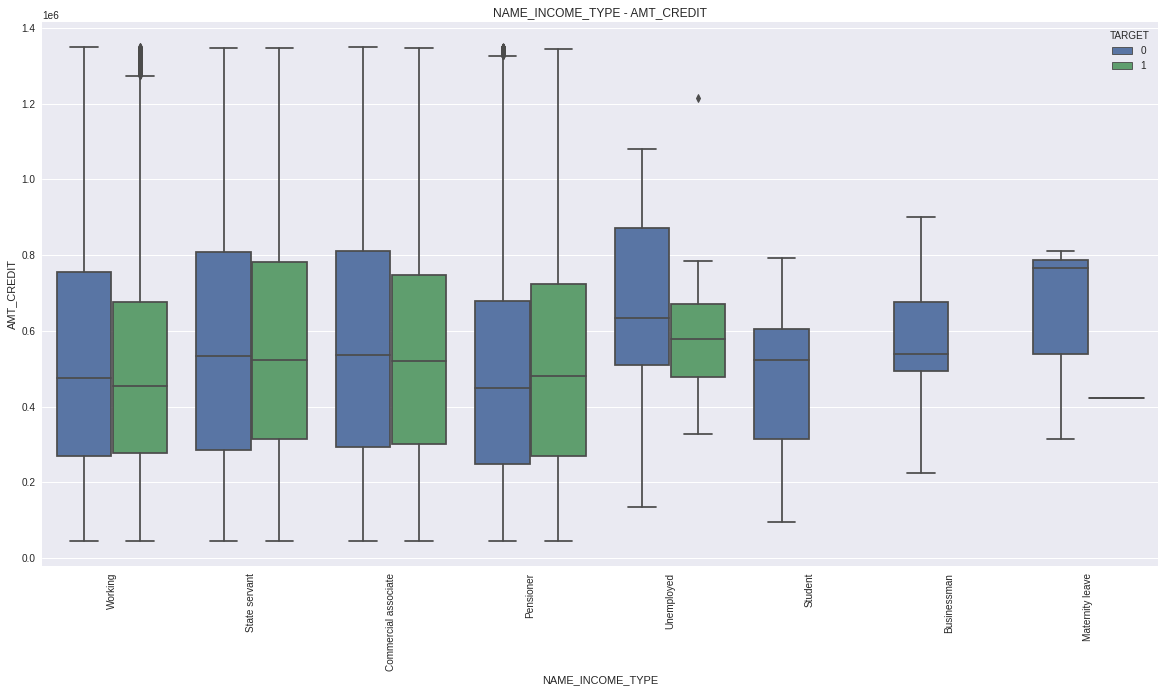

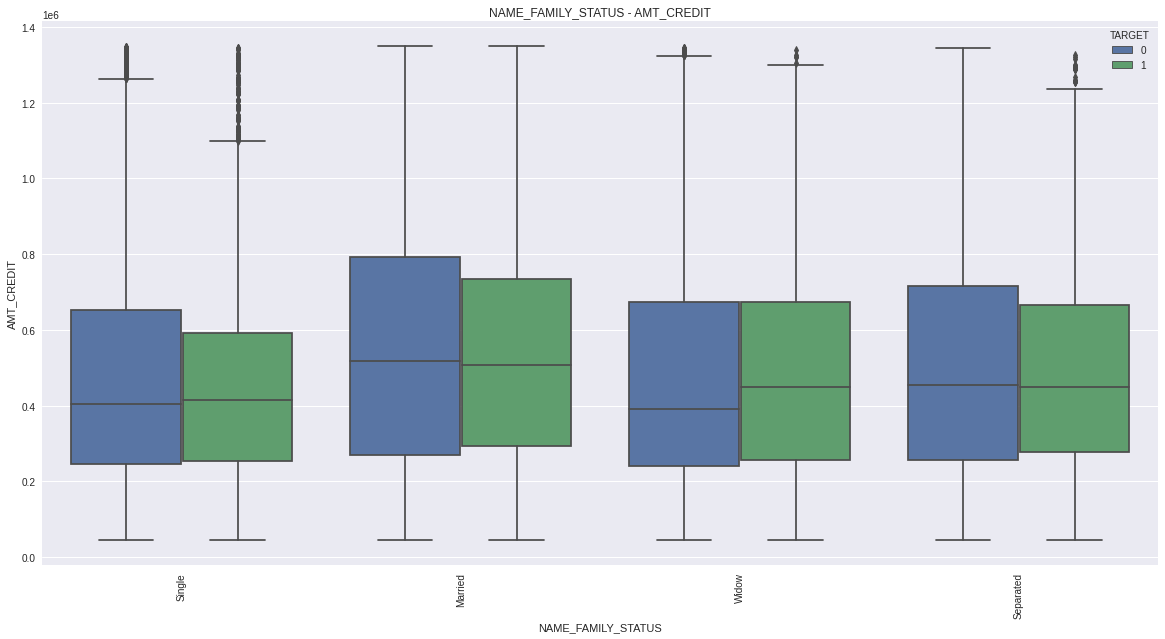

In [65]:
columns_num = ['AMT_ANNUITY','AMT_ANNUITY','AMT_CREDIT','AMT_CREDIT','AMT_CREDIT','OWN_CAR_AGE']
columns_cat = ['NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_FAMILY_STATUS']

i=0
for x,y in zip(columns_cat, columns_num):

      cap = application_df[y].quantile(0.95)

      plt.figure(figsize=[20,10])
      plt.title(x + ' - ' + y)
      sns.boxplot(application_df[x], application_df[y][application_df[y] < cap],orient='v', hue=application_df['TARGET'])
      plt.xticks(rotation=90)
      plt.show()
      print('\n')
      print('\n')
      i+=1

### <b>Inferences:</b>
- Clients with payment difficulties who are unemployed have lesser annuity range.
- Clients who were living in Office apartments and took higher loan annuity defaulted more than other clients living in different setting.
- Defaulted clients took less credit amount with Revolving loans as compared to clients that took more credit amount with Revolving loans in general.
- Among Defaulted clients who are widow, 50 percentile of the clients own car ages 8-14 years old.

**Note - Although, Students and Businessmen collectively constitute of negligible percentage in the client distribution, but non of them have Defaulted.**

### **Top 10 Correlation in each Targets**

##### **TARGET 1**

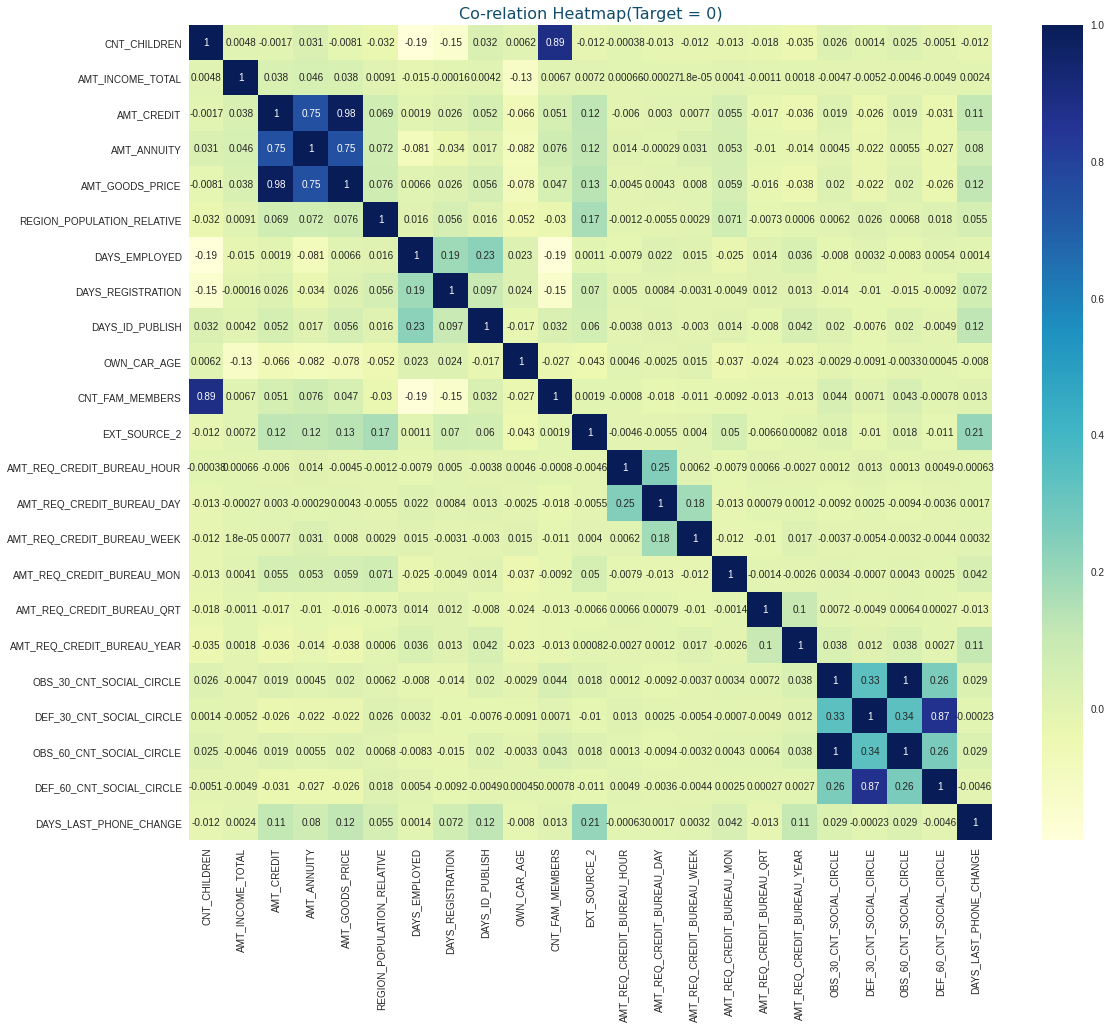

In [66]:
# Co-relation heatmap of numerical variables for app_df_0

numerical_columns = app_df_1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_2',
'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']]
plt.figure(figsize=(18,15))
sns.heatmap(numerical_columns.corr(), cmap='YlGnBu',annot=True)
plt.title("Co-relation Heatmap(Target = 0)",fontdict = fontTitle)
plt.show()

#### *Top 10 correlated numerical for Target 1 app_df*
- GOODS PRICE - CREDIT AMOUNT
- CHILDREN COUNT - FAMILY MEMBERS COUNT
- DEFAULTED ON 60 DPD - DEFAULTED ON 60 DAYS PAST DUE 
- ANNUITY AMOUNT - GOODS PRICE
- DAYS EMPLOYED - DAYS ID PUBLISH
- OBSERVABLE ON 30 DPD - DEFAULTED ON 30 DPD 
- CREDIT AMOUNT - ANNUITY AMOUNT
- AMT_REQ_CREDIT_BUREAU_DAY - AMT_REQ_CREDIT_BUREAU_HOUR
- DAYS ID PUBLISH - DAYS EMPLOYED
- DAYS LAST PHONE CHANGE - EXT SOURCE 2


##### **TARGET 0**

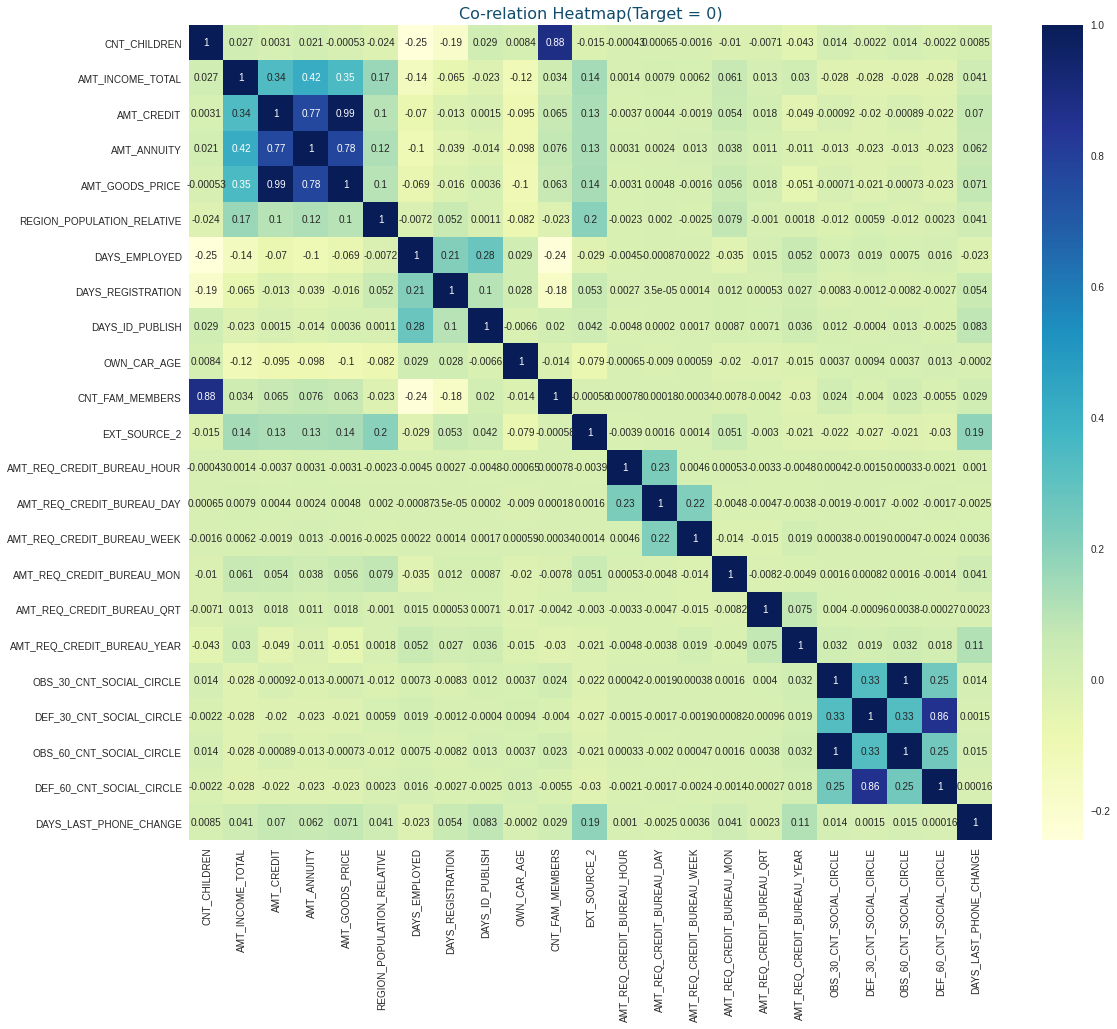

In [67]:
# Co-relation heatmap of numerical variables for app_df_0

numerical_columns = app_df_0[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_2',
'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']]
plt.figure(figsize=(18,15))
sns.heatmap(numerical_columns.corr(), cmap='YlGnBu',annot=True)
plt.title("Co-relation Heatmap(Target = 0)",fontdict = fontTitle)
plt.show()

#### *Top 10 correlated numerical for Target 0 app_df*
- GOODS PRICE - CREDIT AMOUNT
- CHILDREN COUNT - FAMILY MEMBERS COUNT
- DEFAULTED ON 60 DPD - DEFAULTED ON 60 DPD 
- ANNUITY AMOUNT - GOODS PRICE
- ANNUITY AMOUNT - TOTAL INCOME
- GOODS PRICE - TOTAL INCOME
- CREDIT AMOUNT - TOTAL INCOME
- OBSERVABLE ON 30 DPD - DEFAULTED ON 30 DPD
- OBSERVABLE ON 60 DPD - DEFAULTED ON 30 DPD 
- DAYS ID PUBLISH - DAYS EMPLOYED

<b>  Top 4 attributes are similar for Target 1 and Target 0, rest are different

### <b>Numerical-Numerical</b>
- Credit amount - Annuity
- Goods Price - Credit amount
- Years Employed - Annuity
- Region Rating Client - Region Population Relative
- Goods Price - Years Employed

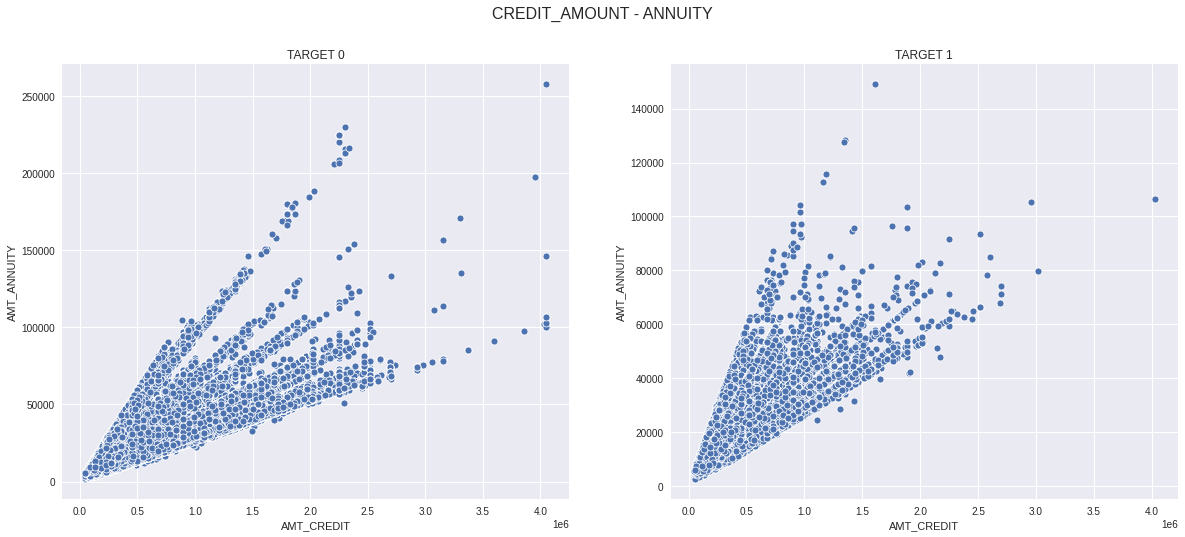

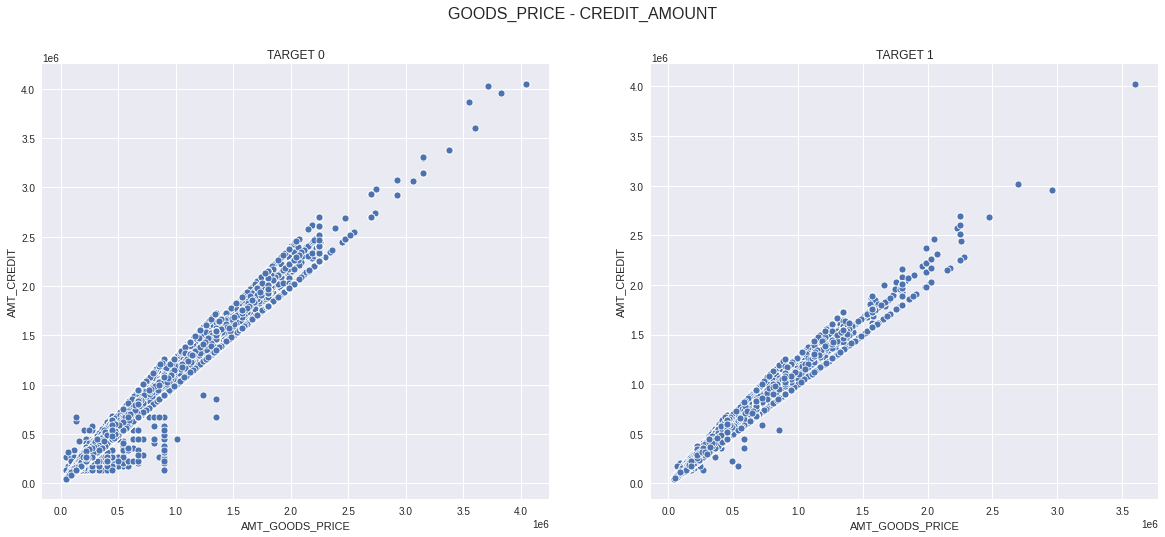

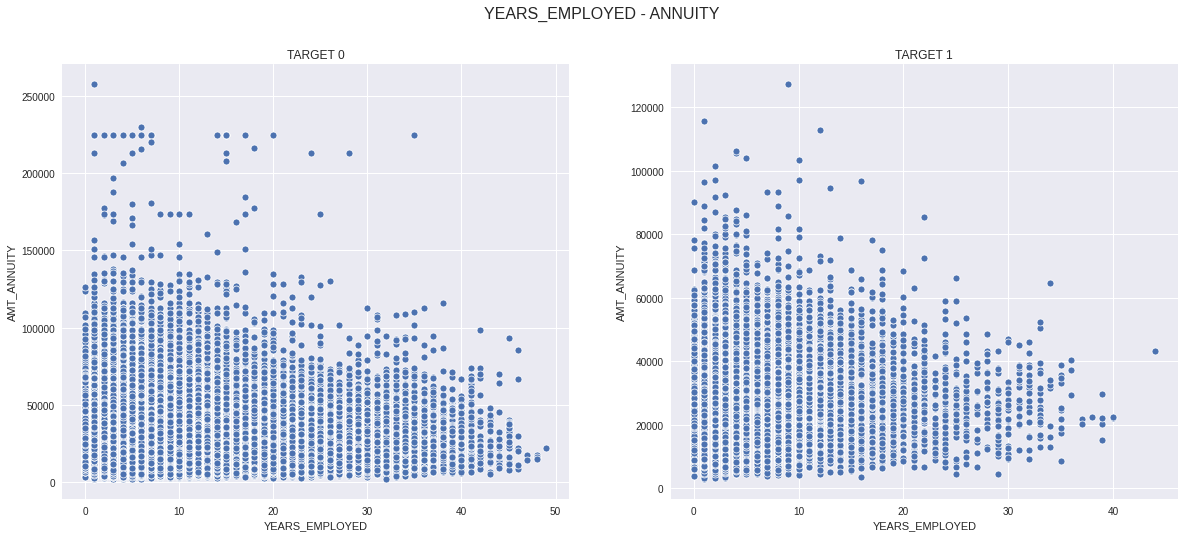

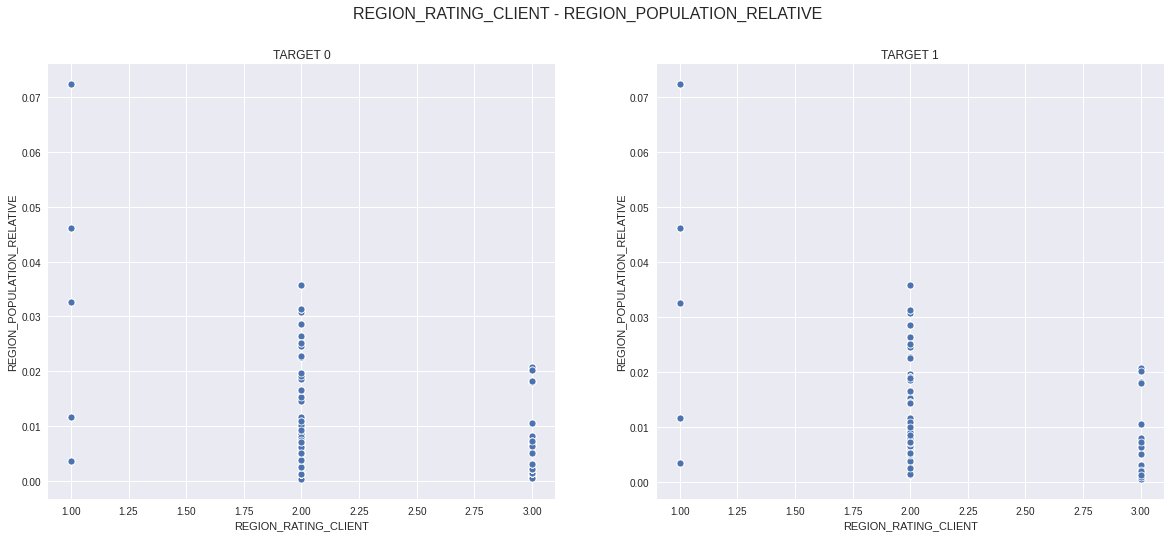

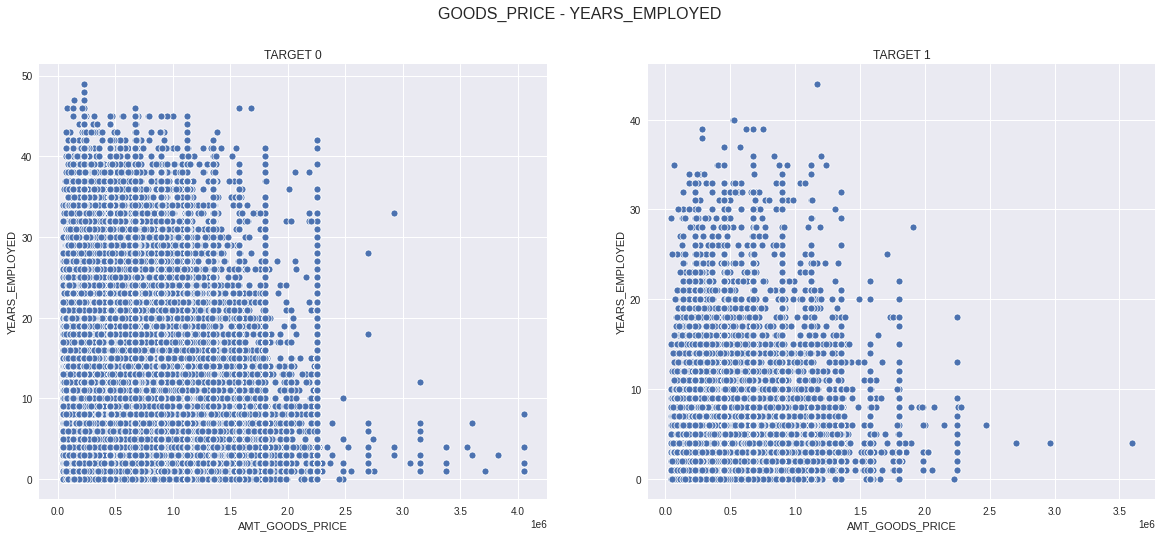

In [68]:
# Plotting scatter plots for attributes which are showing high linearity in above pairplots
cols_x = ['AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','REGION_RATING_CLIENT','AMT_GOODS_PRICE']
cols_y = ['AMT_ANNUITY','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','YEARS_EMPLOYED']

title = ['CREDIT_AMOUNT - ANNUITY','GOODS_PRICE - CREDIT_AMOUNT','YEARS_EMPLOYED - ANNUITY','REGION_RATING_CLIENT - REGION_POPULATION_RELATIVE','GOODS_PRICE - YEARS_EMPLOYED']

i=0
for x,y in zip(cols_x, cols_y):
      fig = plt.figure(figsize=[20,8])
      ax1 = fig.add_subplot(121)
      ax2 = fig.add_subplot(122)

      fig.suptitle(title[i],fontsize=16)
      plt.subplot(1,2,1)
      sns.scatterplot(app_df_0[x], app_df_0[y])
      plt.subplot(1,2,2)
      sns.scatterplot(app_df_1[x], app_df_1[y])

      ax1.title.set_text('TARGET 0')
      ax2.title.set_text('TARGET 1')
      i += 1
      plt.show()
      print('\n')
      print('\n')

### <b>Inferences:</b>
- Irrespective of client type, Credit, Goods Price and Annuality have a linear relationship.
- As years of employment increases, clients generally tend to spend less amount on goods.
- Regional rating of a client tends to be higher for regions with relatively less population.


## <b>e) Merging previous_application_df with Application_df and formatting previous_application_df

### <b>Appending Target column to previous_app_df

In [69]:
previous_app_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [70]:
application_df.iloc[:,:2].head()

SK_ID_CURR  TARGET
0      100002       1
1      100003       0
2      100004       0
3      100006       0
4      100007       0

In [71]:
previous_app_df.shape

(1670214, 37)

In [72]:
# Appending Target column to previous_app_df
previous_app_df = pd.merge(left = previous_app_df,right = application_df.iloc[:,:2] , how='left', on=['SK_ID_CURR'])

In [73]:
previous_app_df.shape

(1670214, 38)

### <b>Formatting previous_app_df

In [74]:
# Formatting NAME_CASH_LOAN_PURPOSE 
previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Building a house or an annex","Buying/Building Property", inplace = True)
previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Buying a garage","Buying/Building Property", inplace = True)
previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Buying a holiday home / land","Buying/Building Property", inplace = True)
previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Buying a home","Buying/Building Property", inplace = True)

previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Car repairs",'Repairs',inplace = True)

previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Buying a used car","Buying a car(Used/New)",inplace = True)
previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Buying a new car","Buying a car(Used/New)",inplace = True)

previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Purchase of electronic equipment","Home equipments",inplace = True)
previous_app_df["NAME_CASH_LOAN_PURPOSE"].replace("Furniture","Home equipments",inplace = True)

In [75]:
previous_app_df["NAME_CONTRACT_STATUS"].replace("Canceled","Cancelled",inplace = True)

In [76]:
# Taking absolute of columns containing no. of days
previous_app_df["DAYS_DECISION"] = previous_app_df["DAYS_DECISION"].abs()
previous_app_df["DAYS_FIRST_DRAWING"] = previous_app_df["DAYS_FIRST_DRAWING"].abs()
previous_app_df["DAYS_FIRST_DUE"] = previous_app_df["DAYS_FIRST_DUE"].abs()
previous_app_df["DAYS_LAST_DUE_1ST_VERSION"] = previous_app_df["DAYS_LAST_DUE_1ST_VERSION"].abs()
previous_app_df["DAYS_LAST_DUE"] = previous_app_df["DAYS_LAST_DUE"].abs()
previous_app_df["DAYS_TERMINATION"] = previous_app_df["DAYS_TERMINATION"].abs()

In [77]:
previous_app_df['DAYS_FIRST_DRAWING'].value_counts().head()

365243.0    934444
228.0          123
224.0          121
212.0          121
223.0          119
Name: DAYS_FIRST_DRAWING, dtype: int64

In [78]:
# Entry "365243" days is an invalid sample, which is present is other "DAYS_*" columns as well. It can be replaced with "NaN"

cols = ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]
for col in cols:
  previous_app_df[col].replace(365243.0,np.nan,inplace = True)

In [84]:
# Replacing XNA and XAP will null values
previous_app_df["NAME_CONTRACT_TYPE"].replace("XNA",np.nan,inplace = True)
previous_app_df["NAME_CLIENT_TYPE"].replace("XNA",np.nan,inplace = True)
previous_app_df['NAME_PORTFOLIO'].replace("XNA",np.nan,inplace = True)
previous_app_df['NAME_CASH_LOAN_PURPOSE'].replace("XNA",np.nan,inplace = True)
previous_app_df['NAME_CASH_LOAN_PURPOSE'].replace("XAP",np.nan,inplace = True)

In [87]:
previous_app_df.TARGET.value_counts()

0.0    1291341
1.0     122360
Name: TARGET, dtype: int64

In [88]:
previous_app_df.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Cancelled        316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [89]:
# Segmenting dataframe based on NAME_CONTRACT_STATUS
prev_df_Approved = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == "Approved"]
prev_df_Cancelled = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == "Cancelled"]
prev_df_Refused = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == "Refused"]
prev_df_Unused = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == "Unused offer"]

## <b>f) Univariate Analysis(Previous_Application_df)
- Categorical Data
- Numerical Data


### <b>Categorical</b>

- Contract Type
- Client Type
- Purpose of Cash Loan
- Payment Method
- Portfolio
- Channel Type

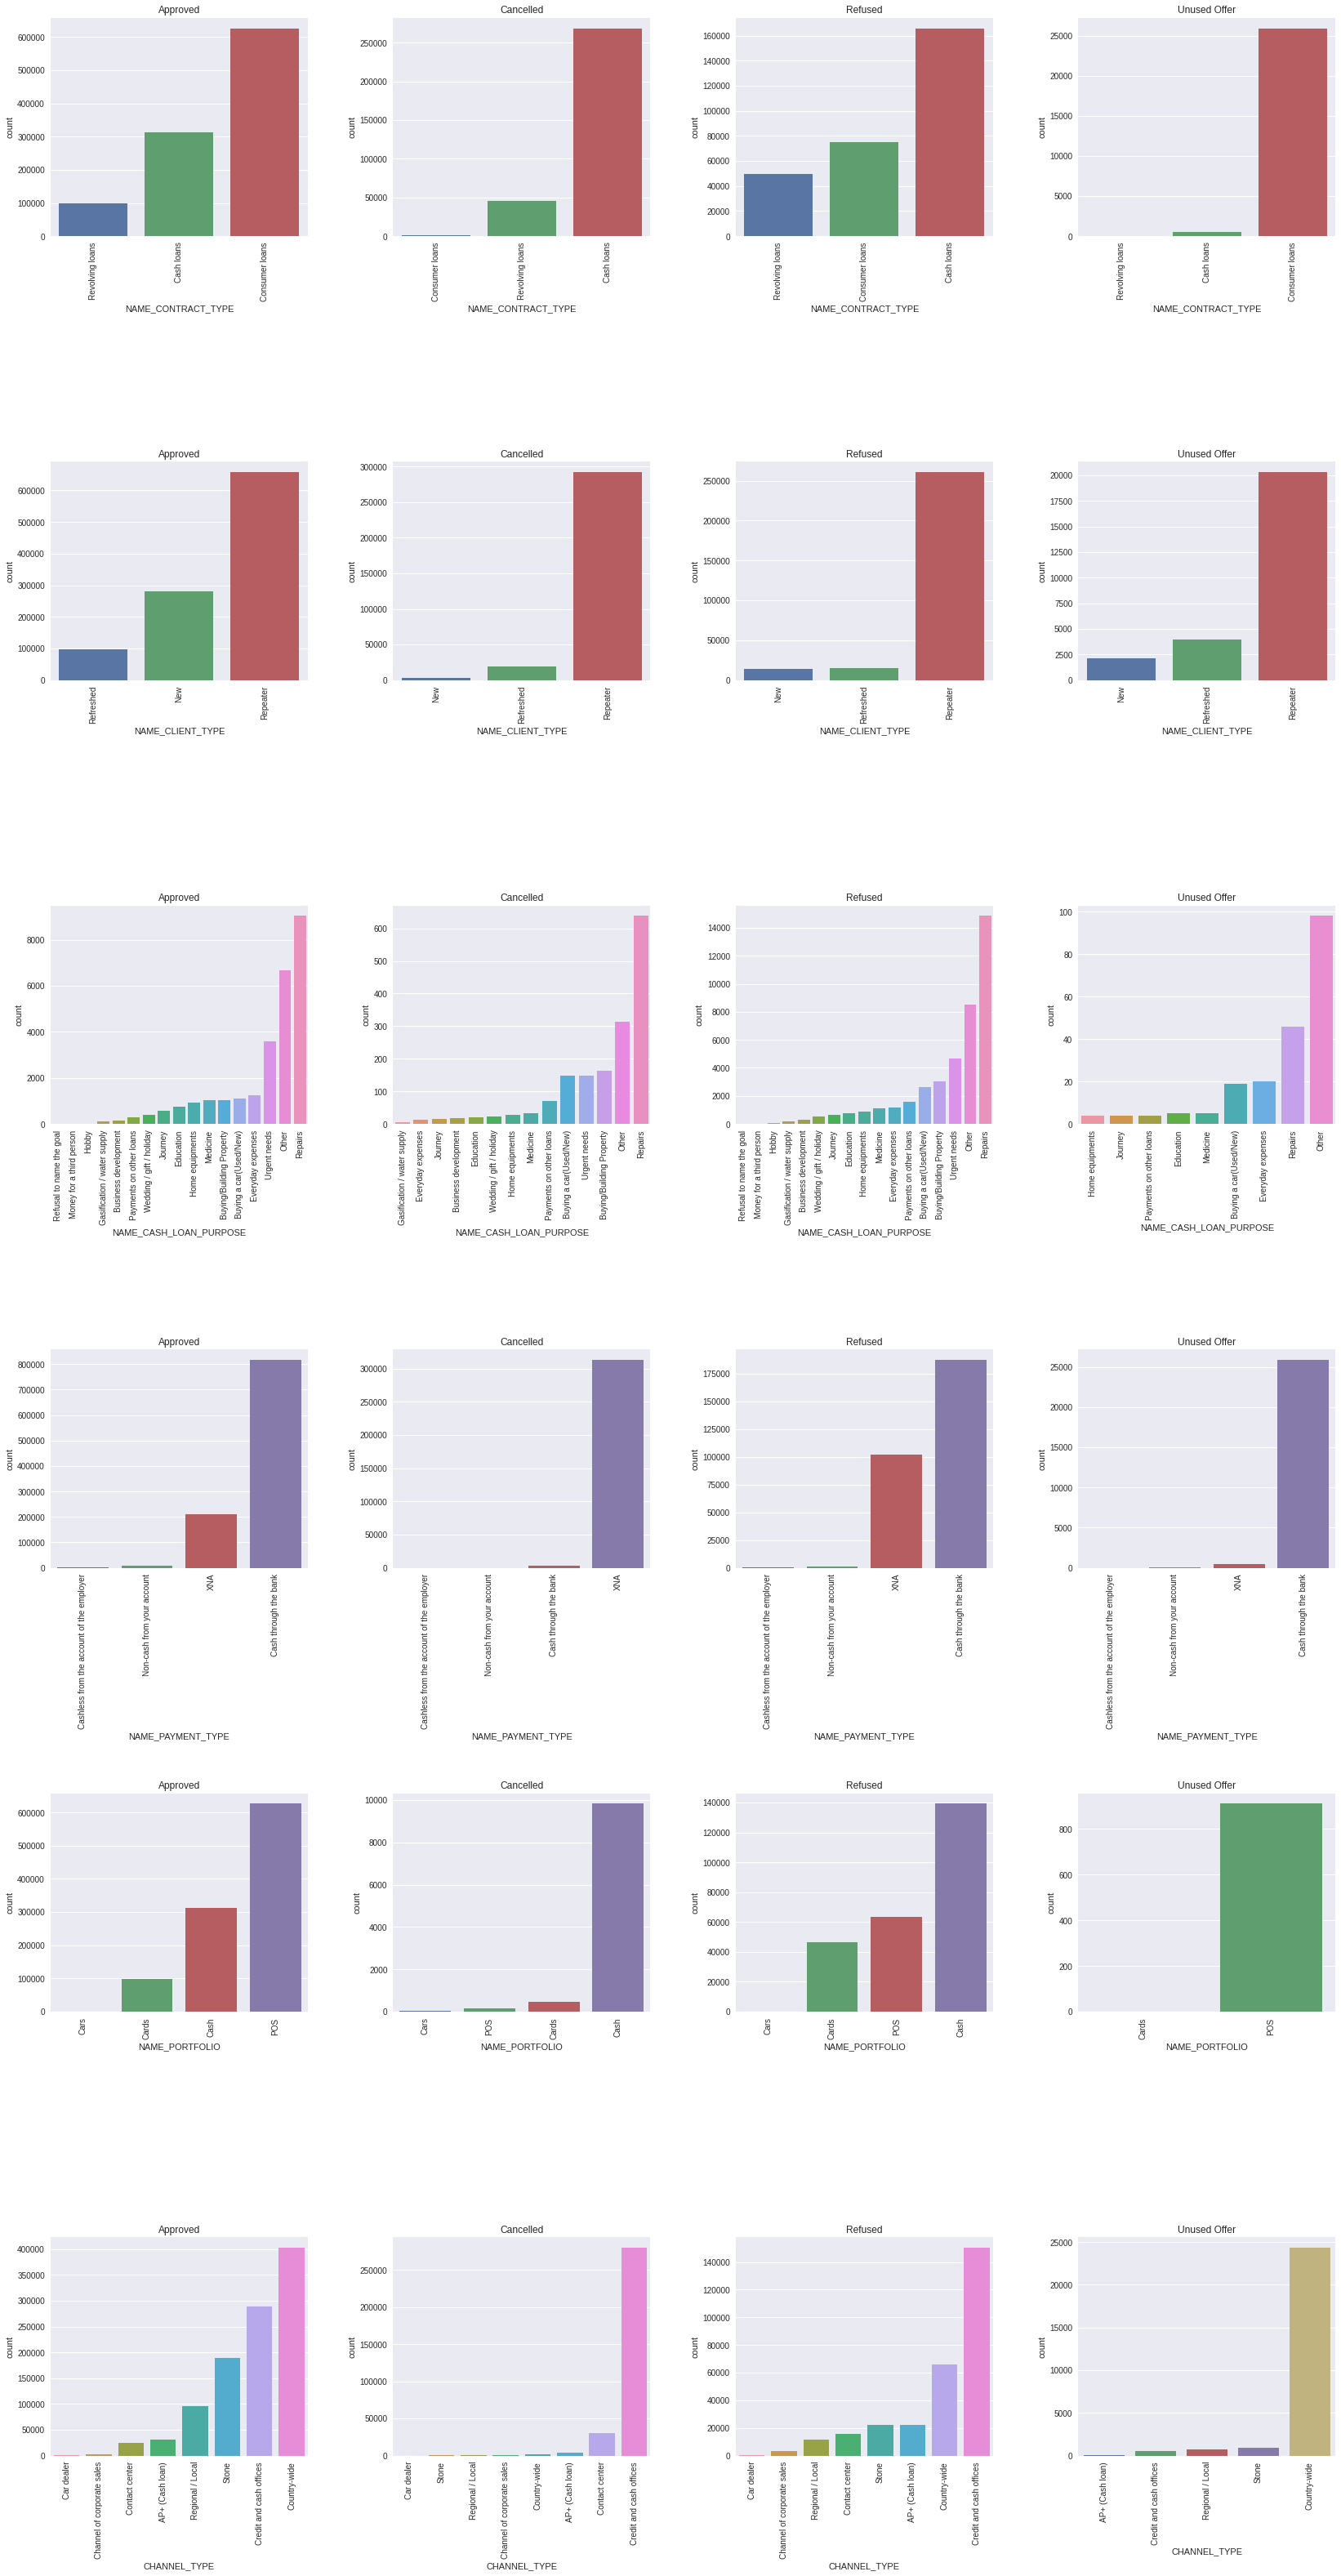

In [90]:
nrow = 6
ncol = 4
fig, ax = plt.subplots(nrow,ncol,figsize = (24,45))
cols = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']
i = 0

for x in range(nrow):
      ax[x,0].set_title('Approved')
      ax[x,1].set_title('Cancelled')
      ax[x,2].set_title('Refused')
      ax[x,3].set_title('Unused Offer')
      
      # Approved
      order_0 = prev_df_Approved[cols[i]].value_counts(ascending=True).index
      sns.countplot(prev_df_Approved[cols[i]],ax=ax[x,0], order=order_0)
      ax[x,0].set_xticklabels(labels = ax[x,0].get_xticklabels() ,rotation=90)
      # Cancelled
      order_1 = prev_df_Cancelled[cols[i]].value_counts(ascending=True).index
      sns.countplot(prev_df_Cancelled[cols[i]],ax=ax[x,1], order=order_1)
      ax[x,1].set_xticklabels(labels = ax[x,1].get_xticklabels() ,rotation=90)
      # Refused
      order_2 = prev_df_Refused[cols[i]].value_counts(ascending=True).index
      sns.countplot(prev_df_Refused[cols[i]],ax=ax[x,2], order=order_2)
      ax[x,2].set_xticklabels(labels = ax[x,2].get_xticklabels() ,rotation=90)
      # Unused Offer
      order_3 = prev_df_Unused[cols[i]].value_counts(ascending=True).index
      sns.countplot(prev_df_Unused[cols[i]],ax=ax[x,3], order=order_3)
      ax[x,3].set_xticklabels(labels = ax[x,3].get_xticklabels() ,rotation=90)

      fig.tight_layout(pad=5)

      i +=1

plt.show()

### <b>Inferences:</b>
- "Cash loan" applications have the highest tendency of getting rejected or cancelled, where as "consumer loans" have the highest approval rate.
- "Repeaters" have the highest applications count. Also "newer" applications are less likely to get cancelled.
- Clients generally take "Cash through the bank" as a payment option.
- Application of cash loans are usaually for "Repair" purposes.
- Portfolio for "cash" requirement have the highest rejection & cancellation. Whereas Portfolio for "POS" requirement have higher approval rate.
- Client's application acquired through "Credit and cash Offices" have higher chances of getting rejected or cancelled.

### <b>Numerical</b>
- Annuity
- Asked Credit
- Approved Credit
- Down Payment
- Decision Days
- Term of Credit

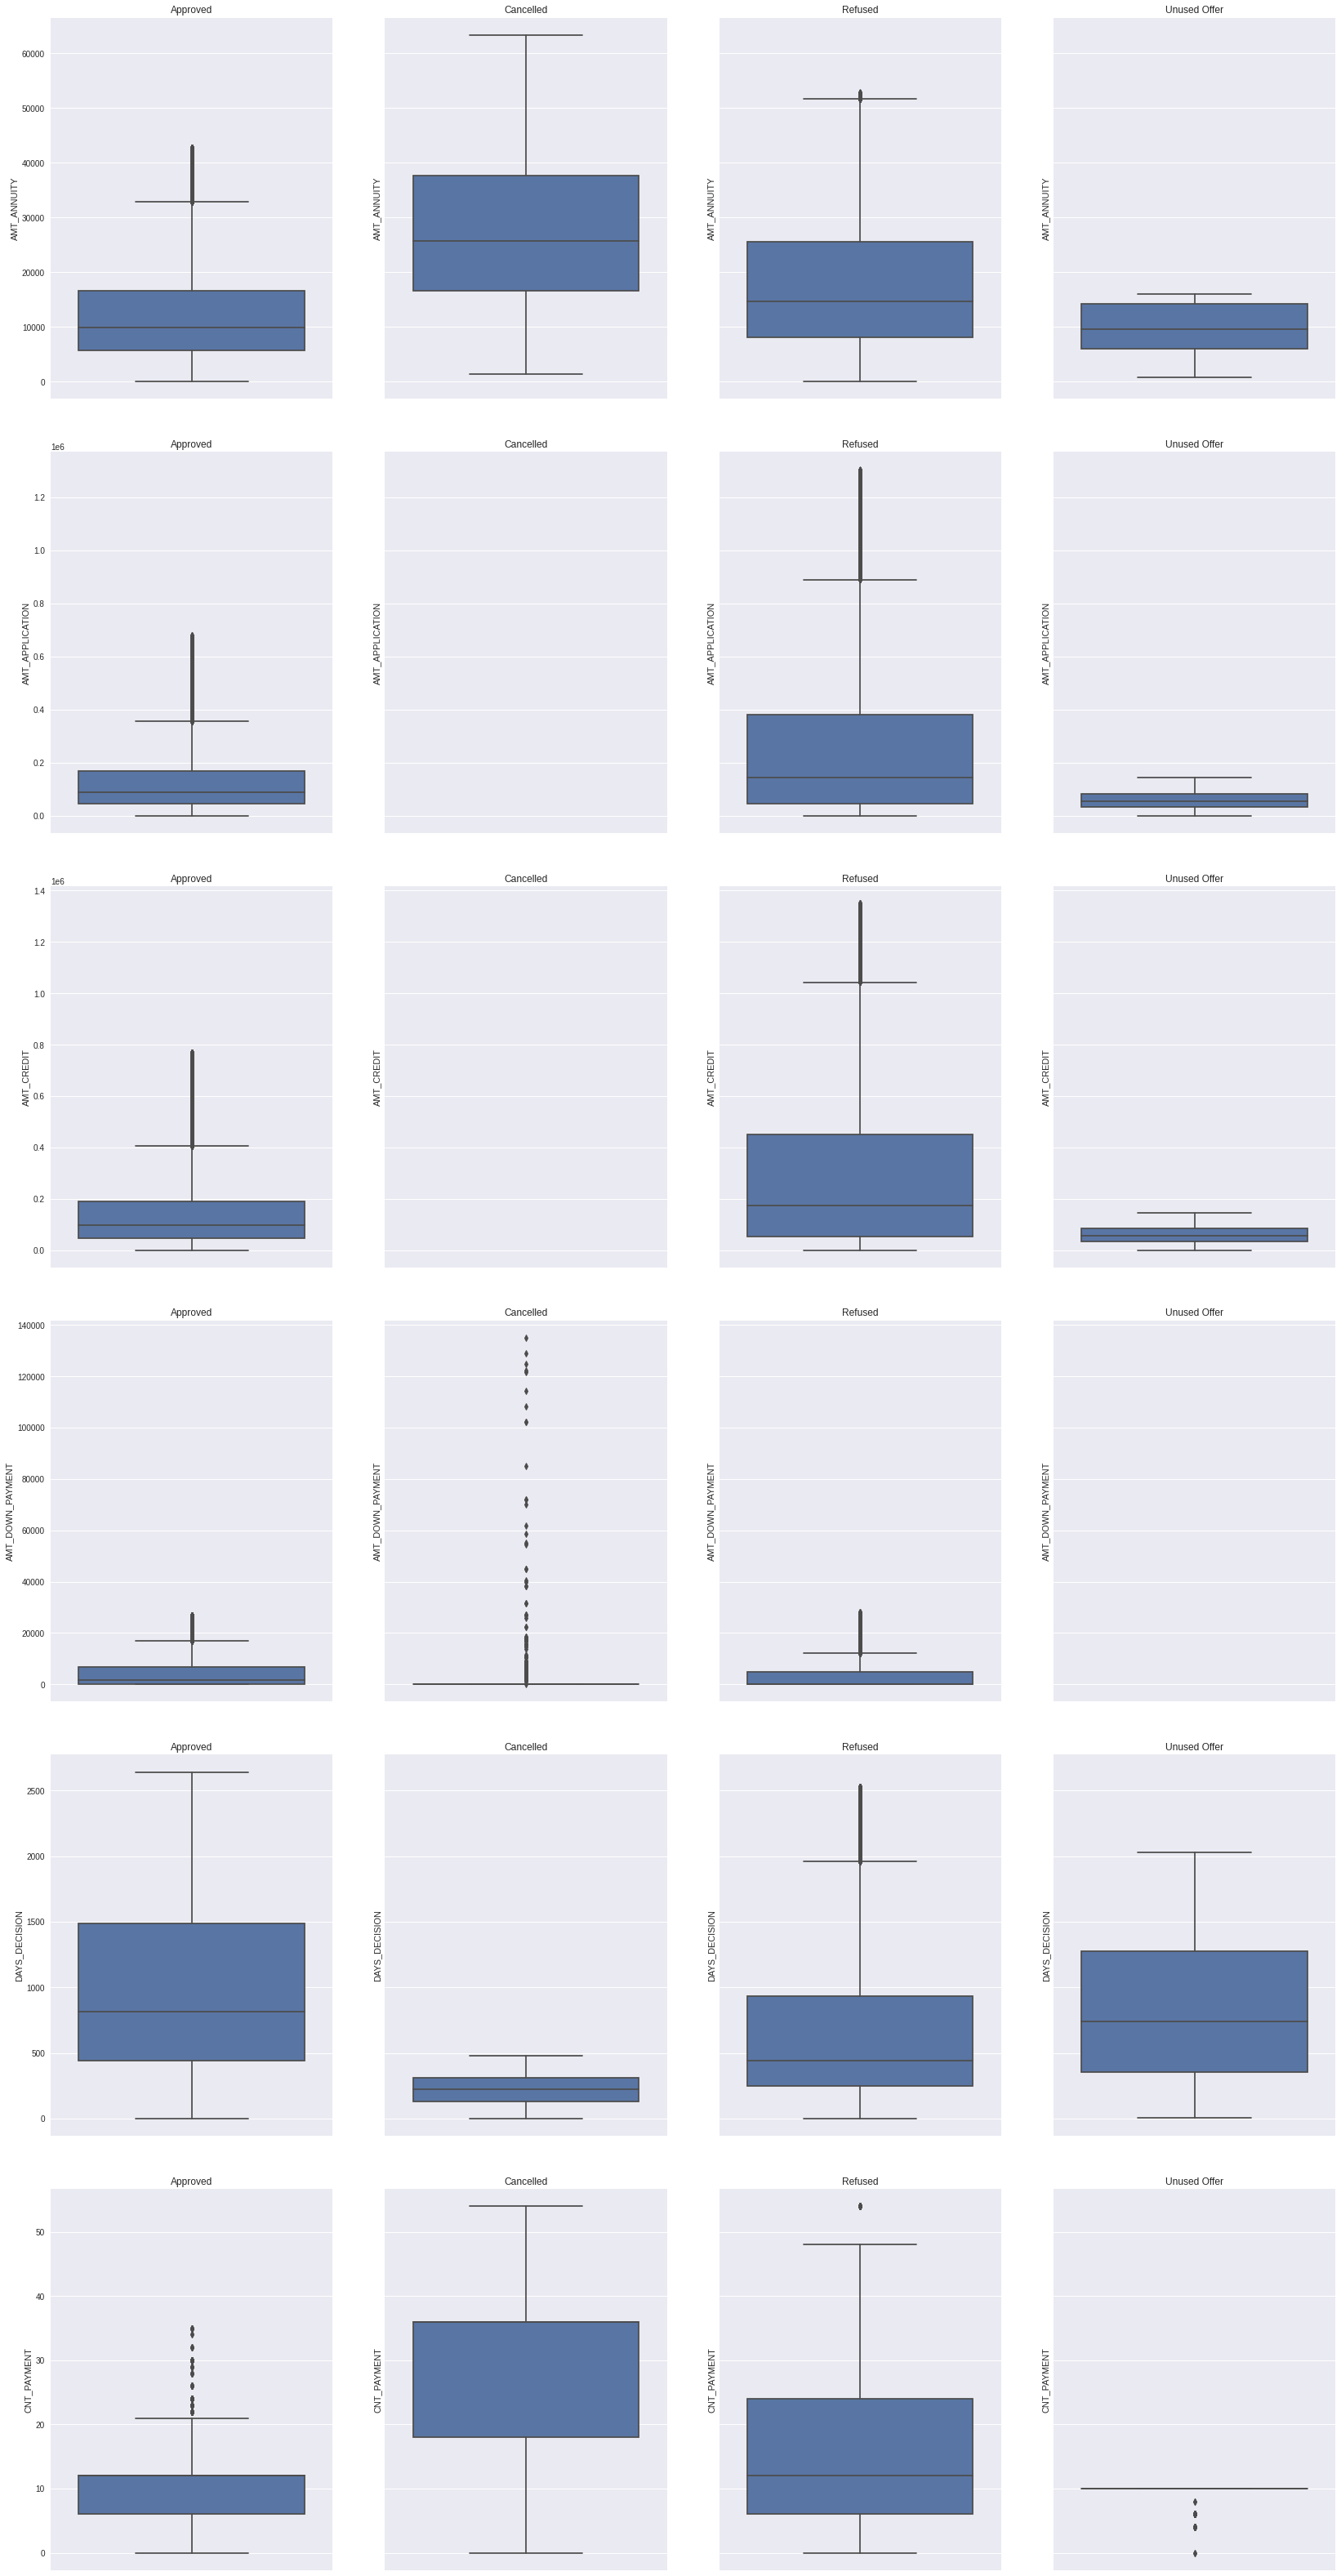

In [91]:
nrow = 6
ncol = 4
fig, ax = plt.subplots(nrow,ncol,figsize = (24,45),sharey='row')
cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','DAYS_DECISION','CNT_PAYMENT']
i = 0

for x in range(nrow): 
      ax[x,0].set_title('Approved')
      ax[x,1].set_title('Cancelled')
      ax[x,2].set_title('Refused')
      ax[x,3].set_title('Unused Offer')
      
      cap_0 = prev_df_Approved[cols[i]].quantile(0.95)
      sns.boxplot(cols[i],data = prev_df_Approved[prev_df_Approved[cols[i]] < cap_0],ax=ax[x,0],orient='v')
      
      cap_1 = prev_df_Cancelled[cols[i]].quantile(0.95)
      sns.boxplot(cols[i],data = prev_df_Cancelled[prev_df_Cancelled[cols[i]] < cap_1],ax=ax[x,1],orient='v')

      cap_2 = prev_df_Refused[cols[i]].quantile(0.95)
      sns.boxplot(cols[i],data = prev_df_Refused[prev_df_Refused[cols[i]] < cap_2],ax=ax[x,2],orient='v')

      cap_3 = prev_df_Unused[cols[i]].quantile(0.95)
      sns.boxplot(cols[i],data = prev_df_Unused[prev_df_Unused[cols[i]] < cap_3],ax=ax[x,3],orient='v')

      fig.tight_layout(pad=5)
 
      i +=1
 
plt.show()


### <b>Inferences:</b>
- Client's application is  less likely to get approved if the Application Amount is very high.
- Decision process usually takes more time if the client's application is likely to get Approved.
- Applications with lesser Term Duration have higher chances of getting Approved.

## <b>g) Bivariate Analysis(Previous_Application_df)
- Categorical - Categorical
- Categorical - Numerical
- Numerical - Numerical

### <b>Categorical - Categorical</b>
- Client Type - Contract Type
- Client Type - Portfolio
- Contract Type - Channel Type
- Contract Type - Portfolio

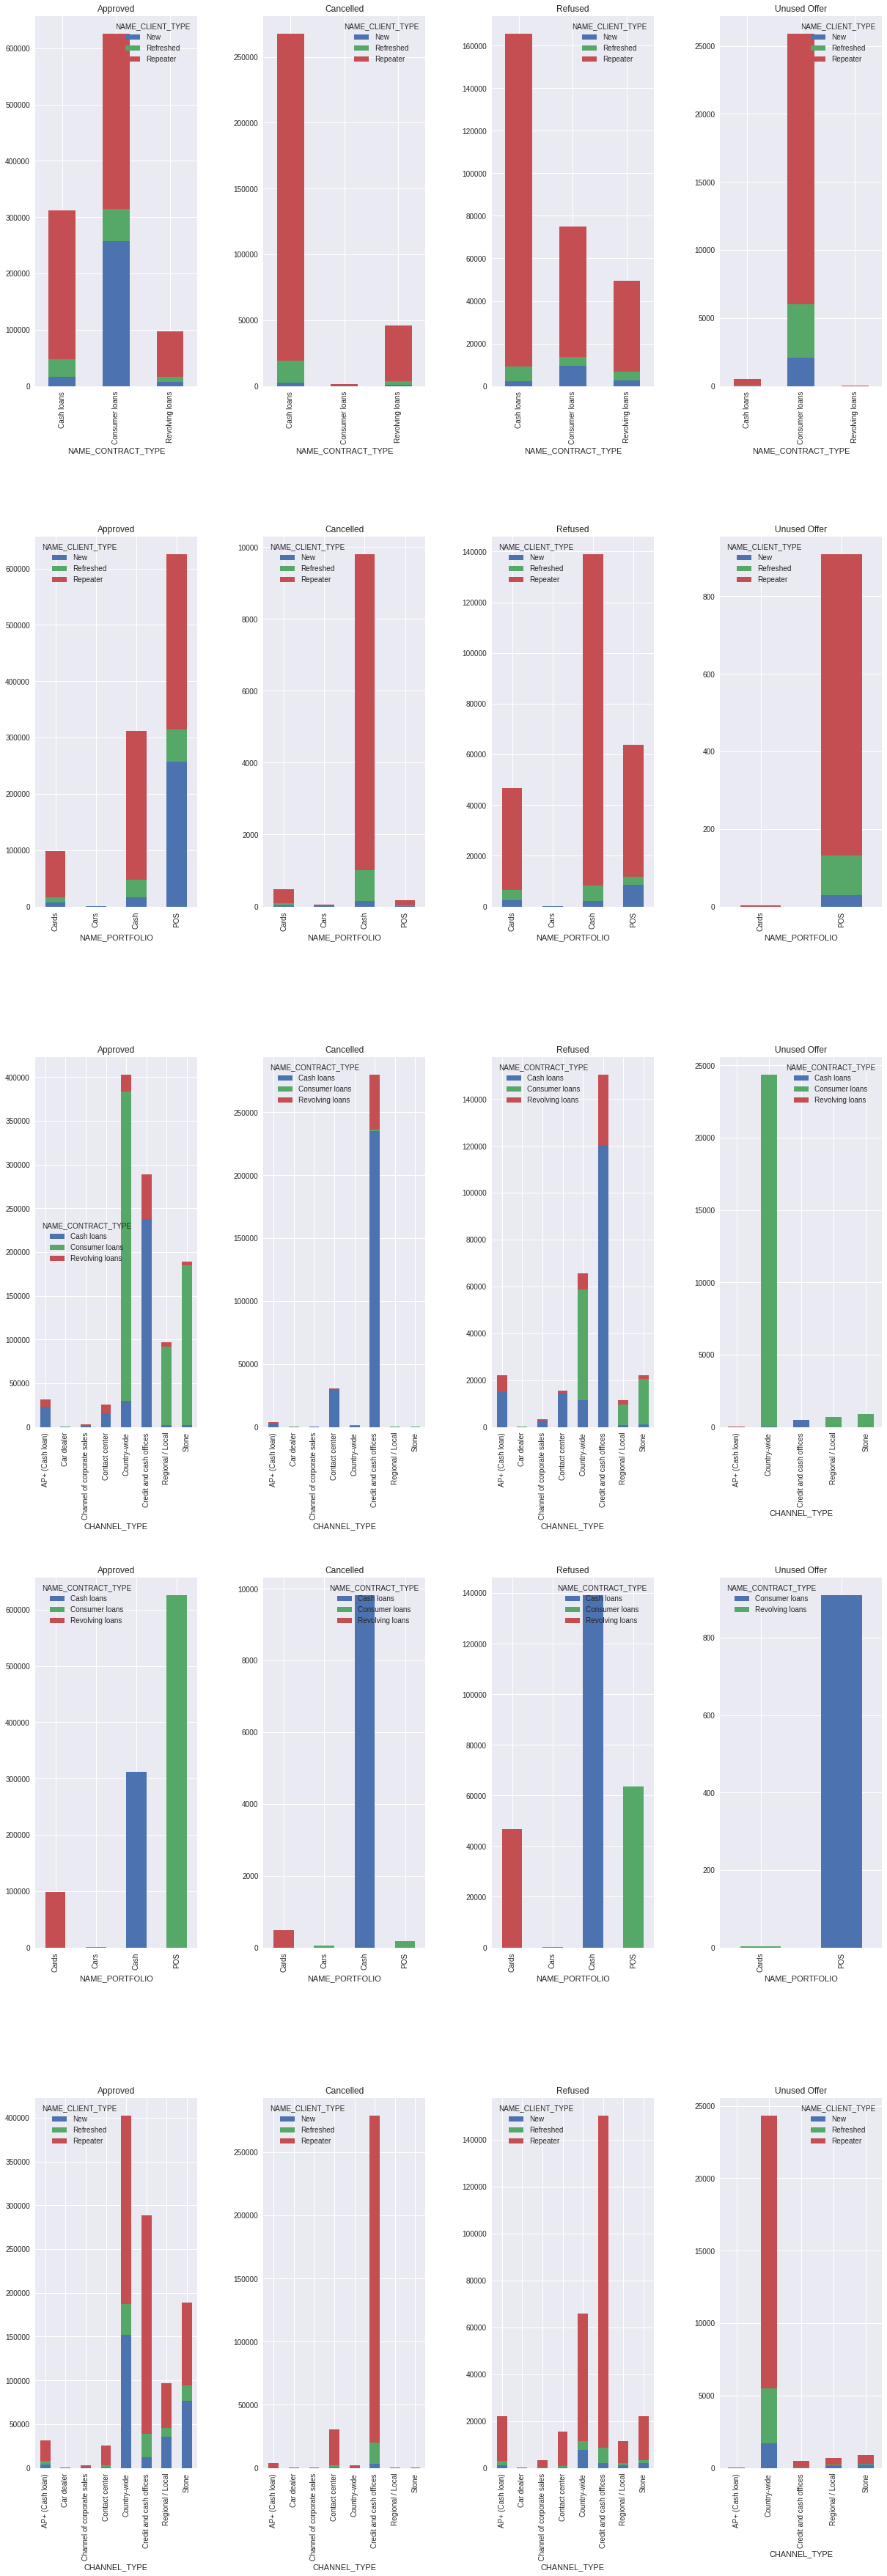

In [92]:
columns = ['NAME_CLIENT_TYPE','NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE']
indices = ['NAME_CONTRACT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

nrow = 5
ncol = 4
fig, ax = plt.subplots(nrow,ncol,figsize = (18,50))
i = 0

for x in range(nrow):
  ax[x,0].set_title('Approved')
  ax[x,1].set_title('Cancelled')
  ax[x,2].set_title('Refused')
  ax[x,3].set_title('Unused Offer')

  (prev_df_Approved.pivot_table(columns=columns[i],index=indices[i],aggfunc='count')['AMT_APPLICATION']).plot.bar(stacked=True,ax=ax[x,0])

  (prev_df_Cancelled.pivot_table(columns=columns[i],index=indices[i],aggfunc='count')['AMT_APPLICATION']).plot.bar(stacked=True,ax=ax[x,1])
  
  (prev_df_Refused.pivot_table(columns=columns[i],index=indices[i],aggfunc='count')['AMT_APPLICATION']).plot.bar(stacked=True,ax=ax[x,2])
  
  (prev_df_Unused.pivot_table(columns=columns[i],index=indices[i],aggfunc='count')['AMT_APPLICATION']).plot.bar(stacked=True,ax=ax[x,3])
  fig.tight_layout(pad=5)

  i +=1


### <b>Inferences:</b>
- New clients generally opt for consumer loans, which are more likely to get approved.
- Newer clients generally apply for "POS" portfolio.
- Consumer loans are usually acquired through "Country-wide" and "Stone" Channels. Similarly cash loans are mostly acquired from "Credit and cash offices".
- "CAR" and "POS" portfolios are mapped to Consumer loans. Similarly "Cards","cash" Portfolios are mapped to Revolving and Cash loans respectively.
- New clients are usually aquired through "Country-wide" and "Stone" Channels.



### <b>Categorical - Numerical</b>
- Decision days - Portfolio
- Decision days - Contract type
- Decision days - Client type
- Credit Request - Contract type
- Credit Request - Client type
- Credit Request - Portfolio



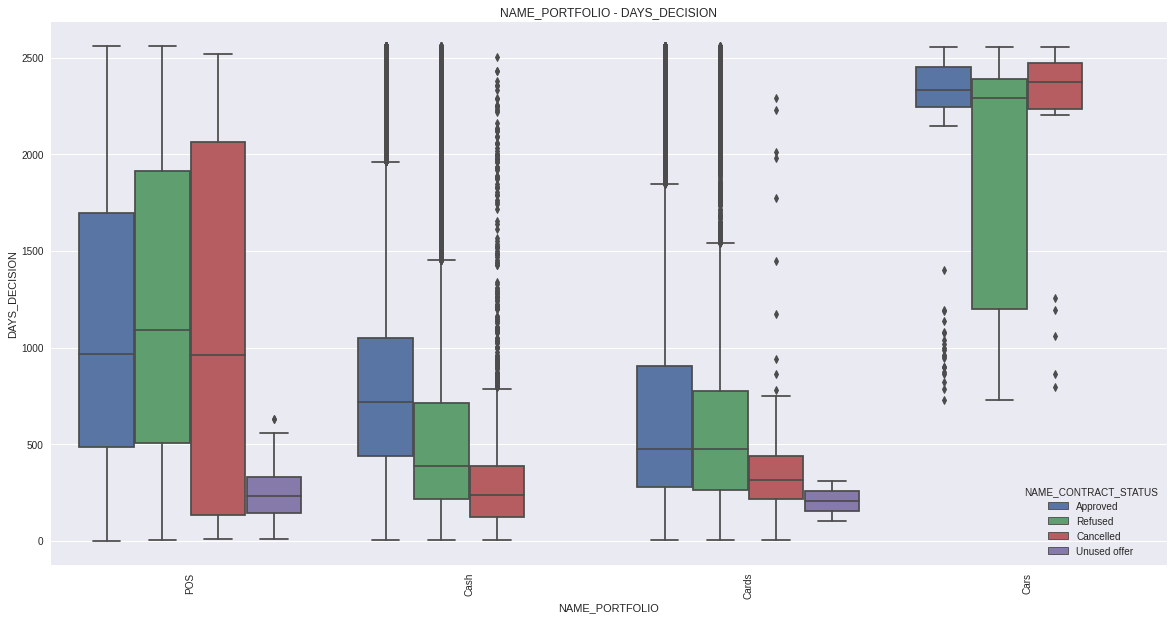

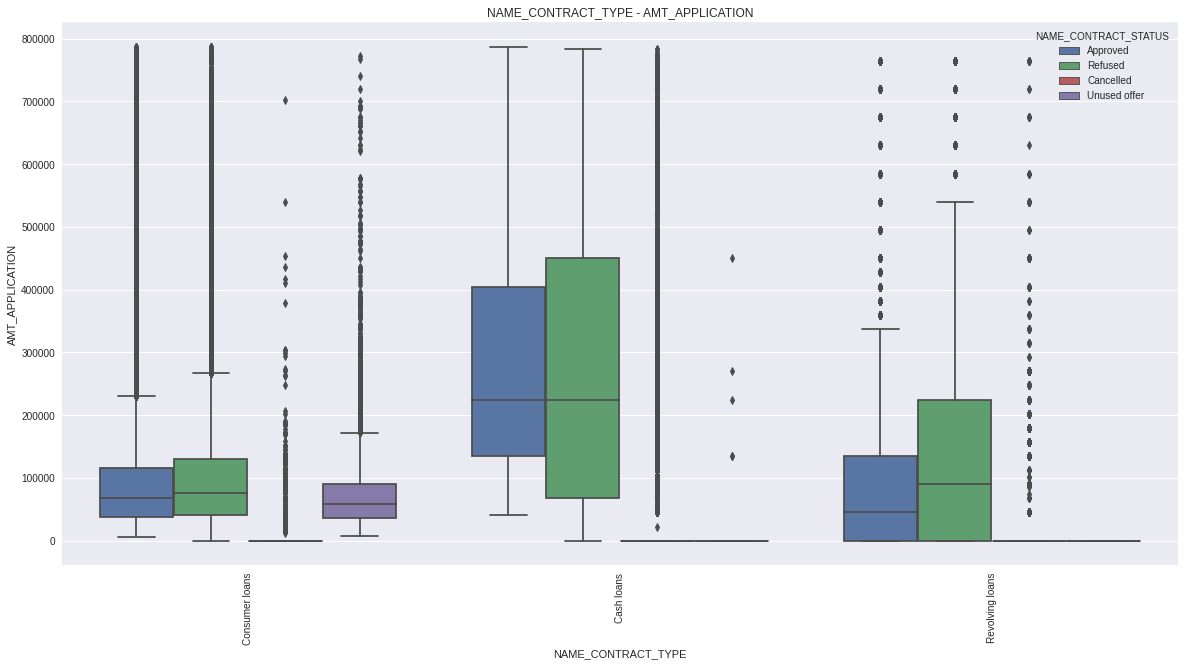

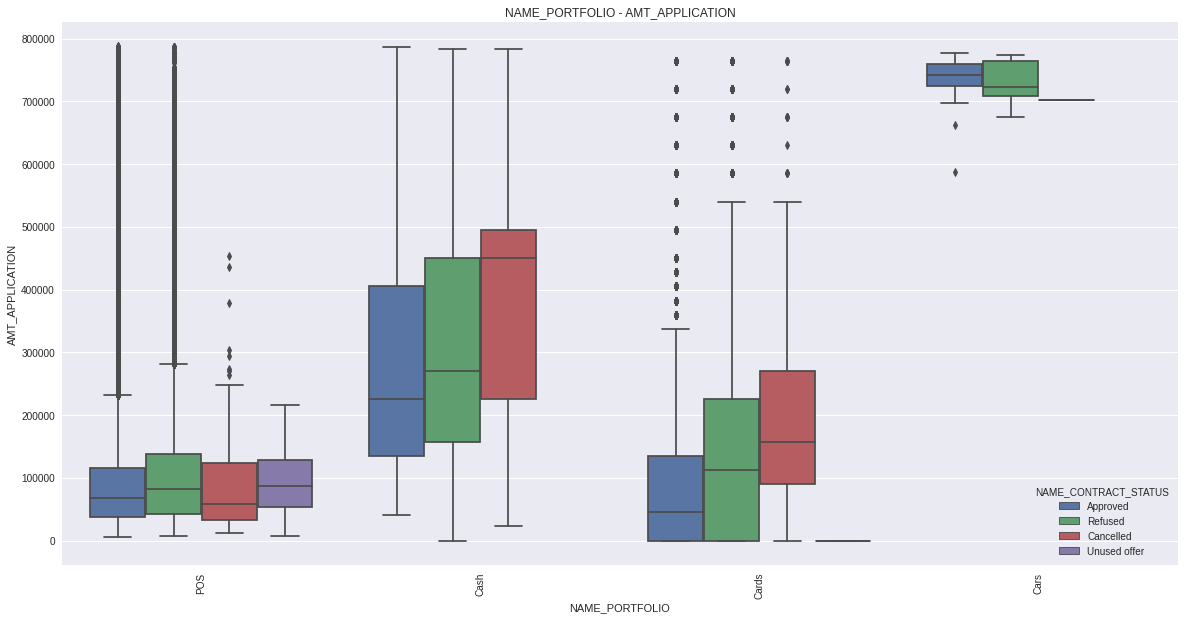

In [93]:
columns_num = ['DAYS_DECISION','DAYS_DECISION','DAYS_DECISION','AMT_APPLICATION','AMT_APPLICATION','AMT_APPLICATION']
columns_cat = ['NAME_PORTFOLIO','NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']

i=0
for x,y in zip(columns_cat, columns_num):

      cap = previous_app_df[y].quantile(0.95)

      plt.figure(figsize=[20,10])
      plt.title(x + ' - ' + y)
      sns.boxplot(previous_app_df[x], previous_app_df[y][previous_app_df[y] < cap],orient='v', hue=previous_app_df['NAME_CONTRACT_STATUS'])
      plt.xticks(rotation=90)
      plt.show()
      print('\n')
      print('\n')
      i+=1


### <b>Inferences:</b>
- "POS" portfolios usually take higher decision days. Whereas "cash" and "card" portfolios generally take fewer decision days.
- Cancellation usually takes fewer decision days, whereas Approval and Refusal of a client's application take more decision days irrespective of loan type.
- Repeaters and Refreshers generally apply for higher application amount that new clients.
- For "POS" portfolios application ammount is generally lower compared to "cash" portfolios.

### <b>Numerical - Numerical</b>
- Application Amount - Credit Amount
- Credit Amount - Goods Price
- Annuity - Credit Amount
- Payment Cnt - Application Amount
- Decision Days - Goods Price

In [94]:
sns.heatmap(previous_app_df[['AMT_CREDIT','AMT_APPLICATION','AMT_ANNUITY','CNT_PAYMENT', 'AMT_GOODS_PRICE','DAYS_DECISION','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT']].corr(),cmap='YlGnBu',annot=True)
plt.show()

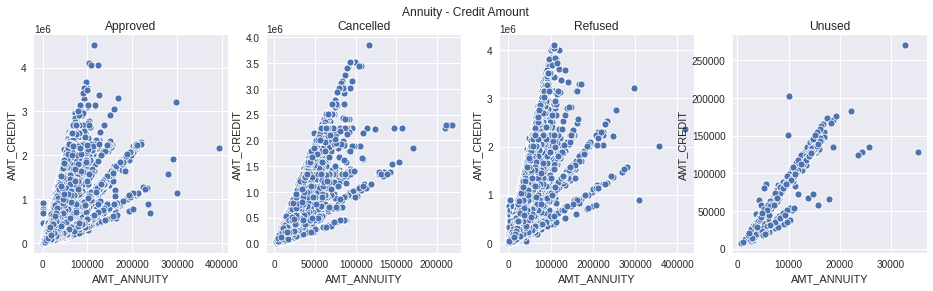

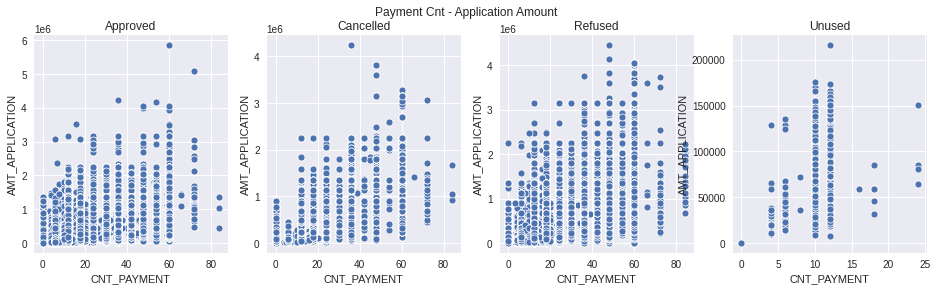

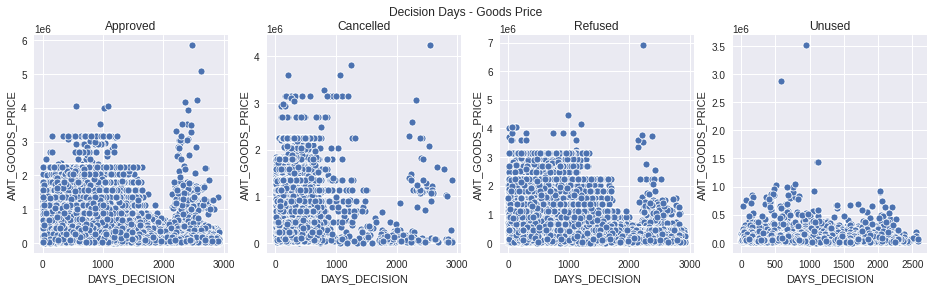

In [95]:
cols_x = ['AMT_GOODS_PRICE','AMT_CREDIT','AMT_APPLICATION','AMT_ANNUITY','AMT_CREDIT','AMT_APPLICATION']
cols_y = ['DAYS_DECISION','AMT_ANNUITY','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE', 'AMT_GOODS_PRICE']

cols_x = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT','DAYS_DECISION']
cols_y = ['AMT_CREDIT','AMT_GOODS_PRICE','AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE']

title = ['Application Amount - Credit Amount','Credit Amount - Goods Price','Annuity - Credit Amount','Payment Cnt - Application Amount','Decision Days - Goods Price']

i=0
for x,y in zip(cols_x, cols_y):
      fig = plt.figure(figsize=[16,4])
      ax1 = fig.add_subplot(141)
      ax2 = fig.add_subplot(142)
      ax3 = fig.add_subplot(143)
      ax4 = fig.add_subplot(144)

      fig.suptitle(title[i],fontsize=12 )
      plt.subplot(1,4,1)
      sns.scatterplot(prev_df_Approved[x], prev_df_Approved[y])
      plt.subplot(1,4,2)
      sns.scatterplot(prev_df_Cancelled[x], prev_df_Cancelled[y])
      plt.subplot(1,4,3)
      sns.scatterplot(prev_df_Refused[x], prev_df_Refused[y])
      plt.subplot(1,4,4)
      sns.scatterplot(prev_df_Unused[x], prev_df_Unused[y])
      ax1.title.set_text('Approved')
      ax2.title.set_text('Cancelled')
      ax3.title.set_text('Refused')
      ax4.title.set_text('Unused')
      i += 1
      plt.show()
      print('\n')
      print('\n')


### <b>Inferences:</b>
- Application amount, annuity, credit amount and goods price show high linearity.
- Generally higher the term duration more is the application amount.

## **h) Final Words**

<b>Conclusions:</b>

- As per Age Distribution, clients between 25 to 34 years of age are having the most payment difficulties.

- Ratio between gender is less for clients with payment difficulties.

- Credit score generally seems to be lower for clients with payment difficulties.

- Clients with payment difficulties generally own car that is older (2 to 3 years) than clients with no payment difficulties.

- Clients with payment difficulties who falls under 25 to 34 age group have slightly more tendency to have a home compared to other age groups.

- Defaulted clients took less credit amount with Revolving loans as compared to clients that took more credit amount with Revolving loans in general.

<b>Recommendation:</b>

To identify whether the client will face any difficulty in paying back the loan can be identified by below parameters:

- AGE_DISTRIBUTION
- CODE_GENDER
- EXT_SOURCE_2
- OWN_CAR_AGE
- FLAG_OWN_REALITY
- NAME_CONTACT
- AMT_CREDIT
- ANNUITY